# 1. 1 Imports - EDA

In [3]:

import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import kaggle

In [4]:
KAGGLE_USERNAME = "marpenalva"
KAGGLE_KEY = "ea42f53179cfa2f6eac83929293413f4"

kaggle.api.authenticate()

def download_file_from_kaggle(dataset, path):
    kaggle.api.dataset_download_files(dataset, path=path, unzip=True)

dataset = "appetukhov/international-trade-database"  # Dataset correcto
download_path = "data/"

if not os.path.exists(download_path):
    os.makedirs(download_path)

download_file_from_kaggle(dataset, download_path)


file_path = os.path.join(download_path, 'trade_1988_2021.csv')
df = pd.read_csv(file_path)

print(df.head())

Dataset URL: https://www.kaggle.com/datasets/appetukhov/international-trade-database
  ReporterISO3 ReporterName PartnerISO3 PartnerName  Year TradeFlowName  \
0          AFG  Afghanistan         SWE      Sweden  2017        Export   
1          AFG  Afghanistan         JOR      Jordan  2018        Export   
2          AFG  Afghanistan         JOR      Jordan  2017        Export   
3          AFG  Afghanistan         ITA       Italy  2018        Export   
4          AFG  Afghanistan         ITA       Italy  2017        Export   

   TradeValue in 1000 USD  
0                  86.752  
1                2796.481  
2                3100.187  
3                 279.918  
4                 416.642  


In [5]:
df = df.rename(columns={'TradeValue in 1000 USD': 'TradeValue'})

In [6]:
df = df.drop(columns=['ReporterISO3', 'PartnerISO3'])
df = df.rename(columns={'ReporterName': 'Reporter', 'PartnerName': 'Partner', 'TradeFlowName': 'TradeFlow'})
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]
df= df.fillna(0)

In [7]:
palabra = 'World'
df = df[~df['Partner'].str.contains(palabra)]

In [8]:
grouped_data = df.groupby(['Year', 'Partner'])['TradeValue'].sum().reset_index()

grouped_data.rename(columns={'TradeValue': 'TotalTradeValue'}, inplace=True)

## 1.1.1 Importaciones mundiales 2000 - 2020

In [ ]:
years = grouped_data['Year'].unique()

for year in range(2000, 2021):

    data_year = grouped_data[grouped_data['Year'] == year]
    
    fig = px.scatter(data_year, x='Partner', y='TotalTradeValue',
                     size='TotalTradeValue',
                     color='TotalTradeValue',
                     hover_name='Partner',
                     labels={'PartnerName': 'Partner', 'TotalTradeValue': 'Total Value in 1000 USD'},
                     title=f'Imports by country in the year {year}', 
                     size_max=60)
    
    fig.update_layout(width=1000, height=600)
    
    fig.show()
    
    pio.write_html(fig, file=f'graphs/imp/imports_{year}.html', auto_open=False)

## 2.1.2 Top 10 países con más importaciones 2000 - 2020

C:\Users\maarp\AppData\Local\Temp\ipykernel_9036\1355357572.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


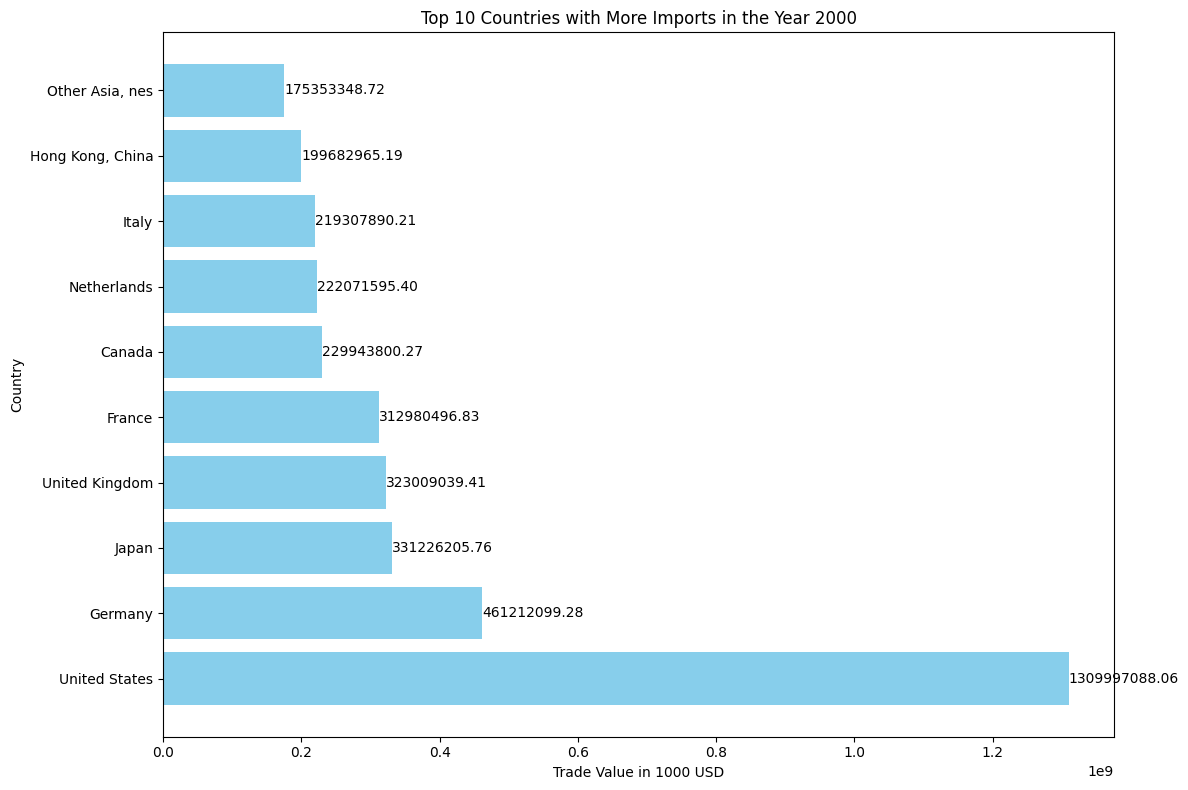

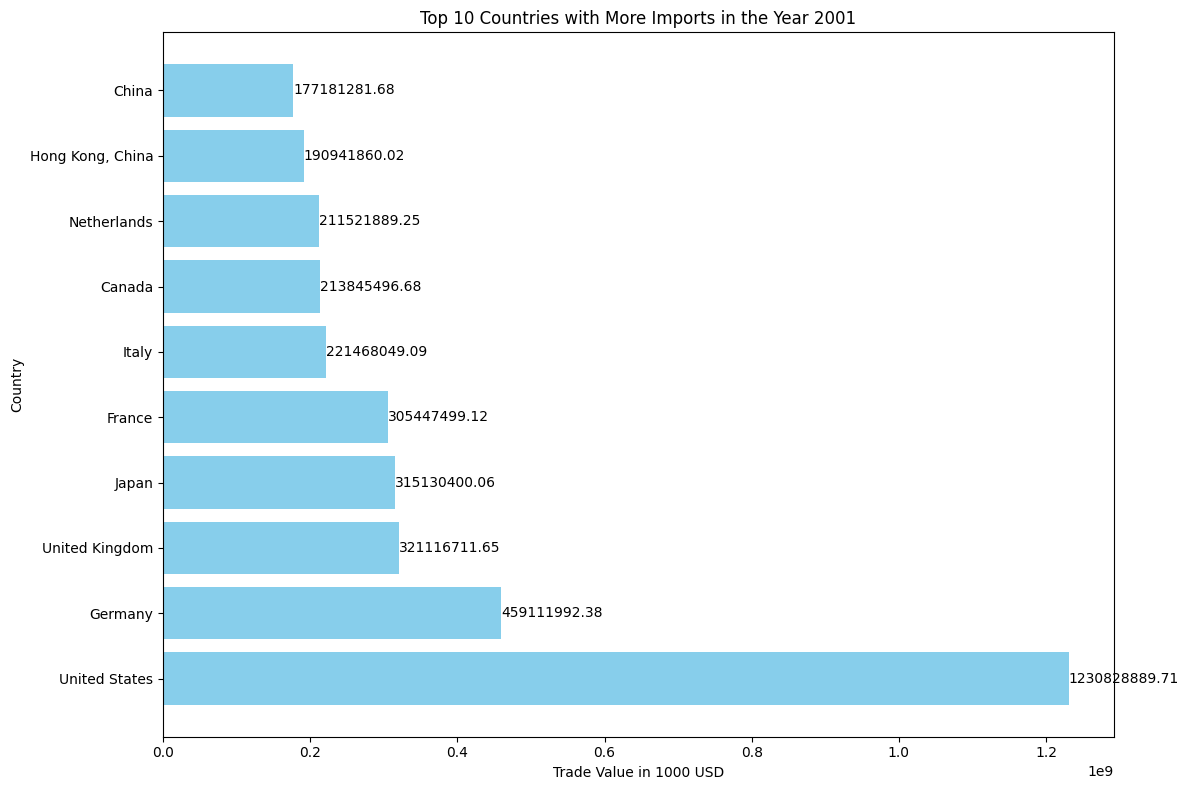

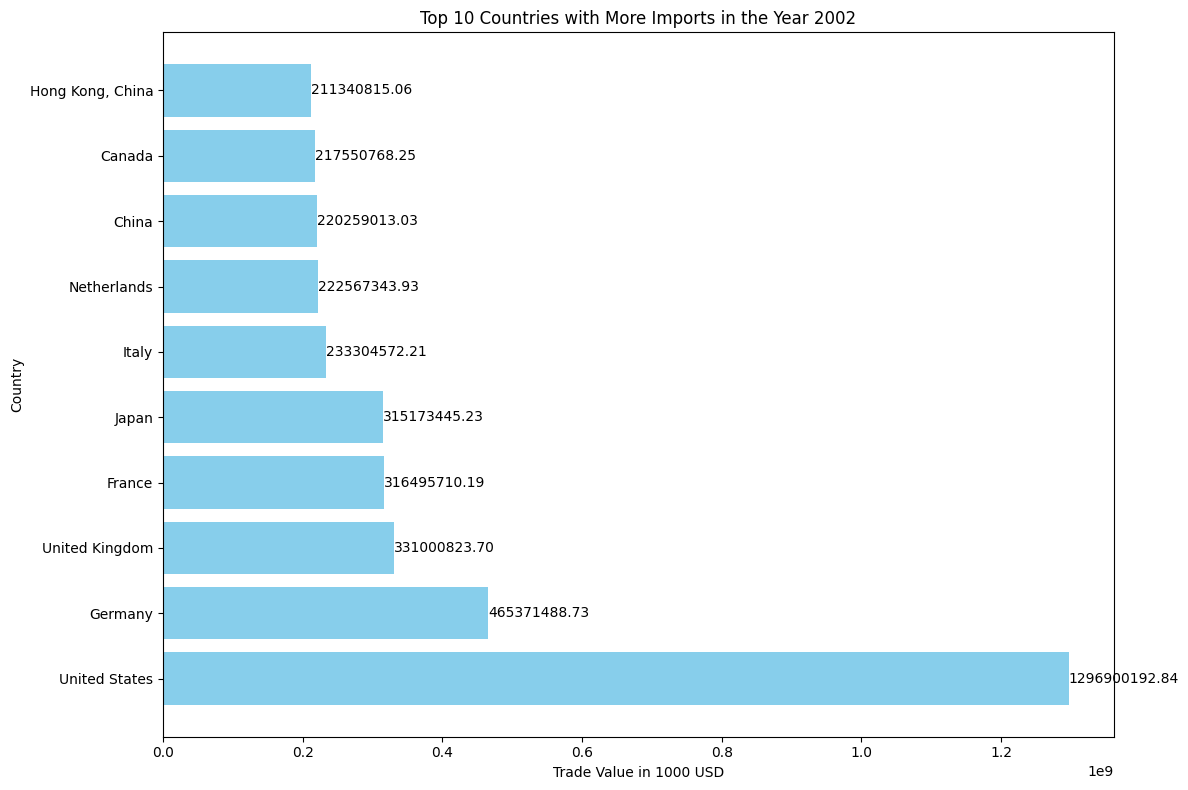

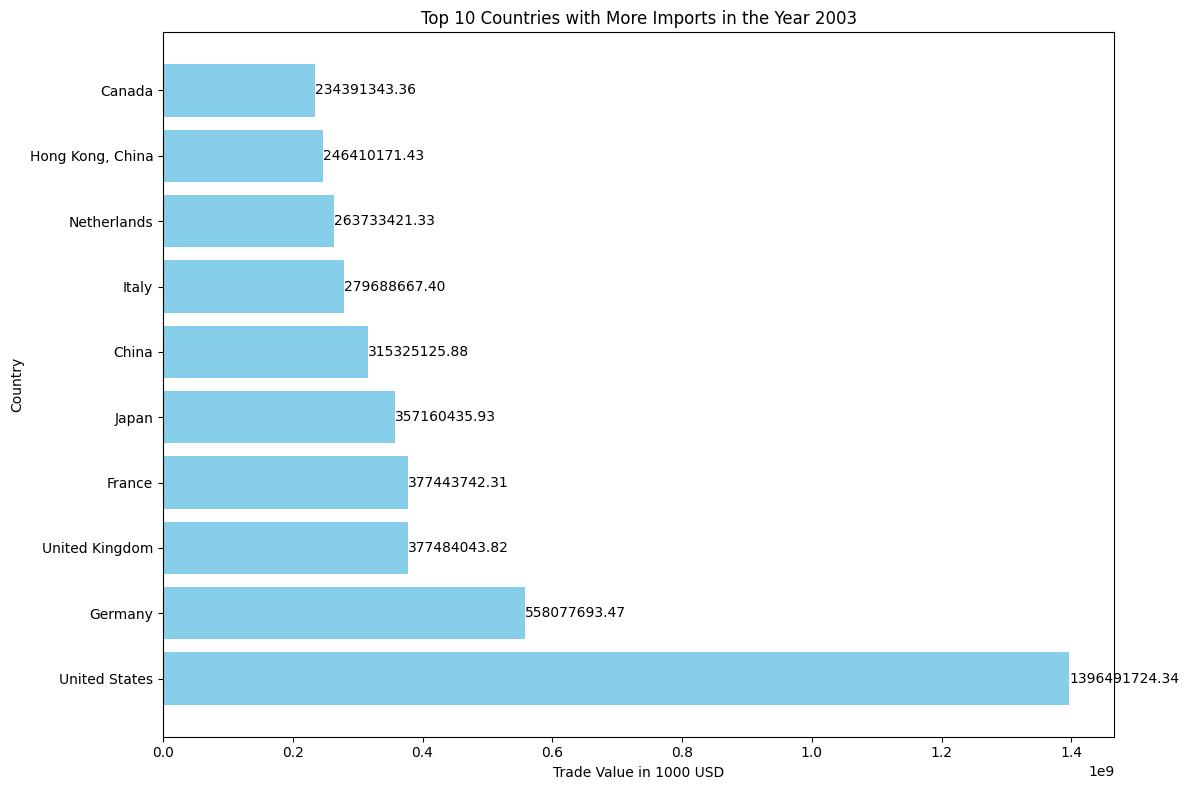

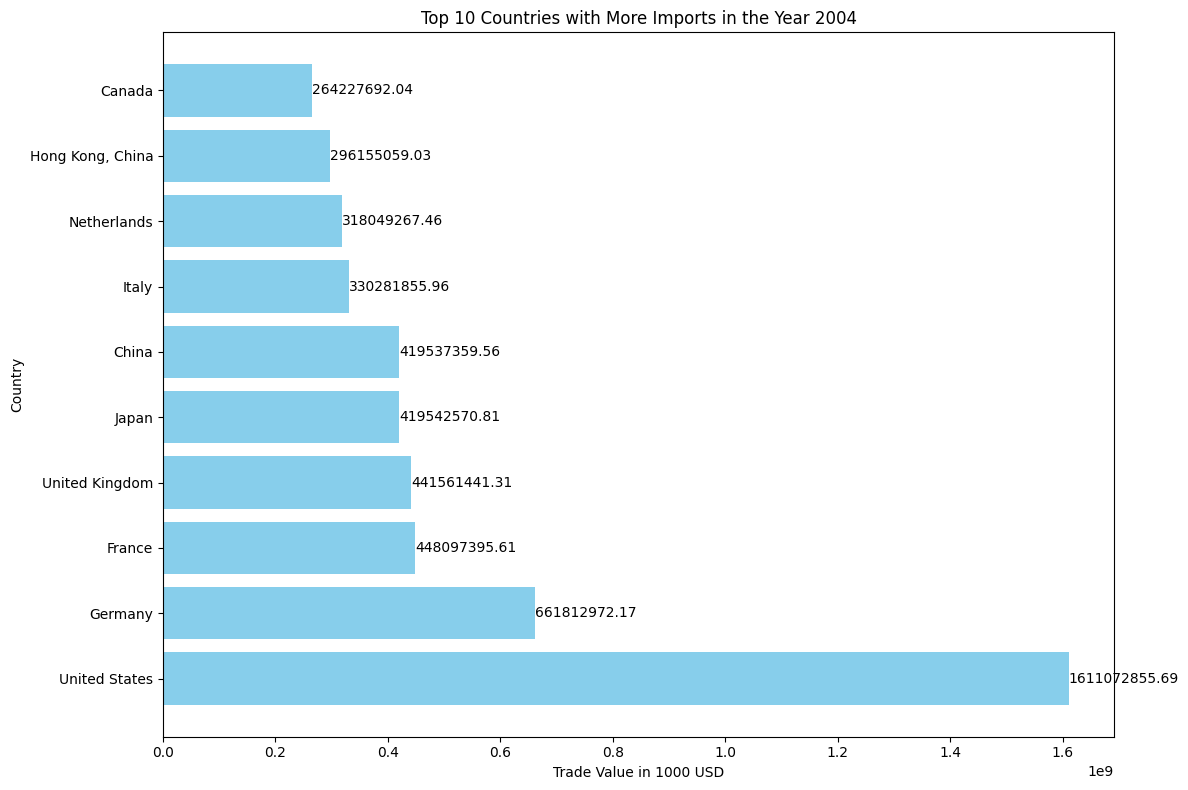

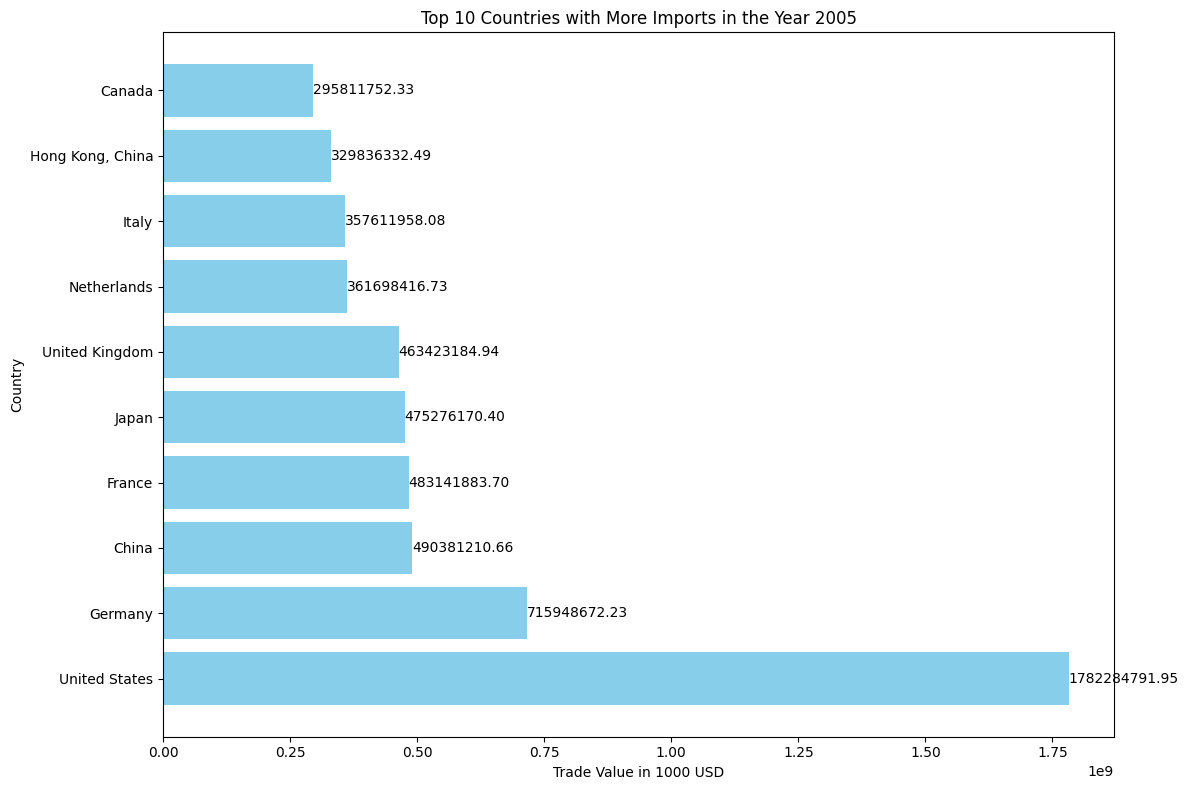

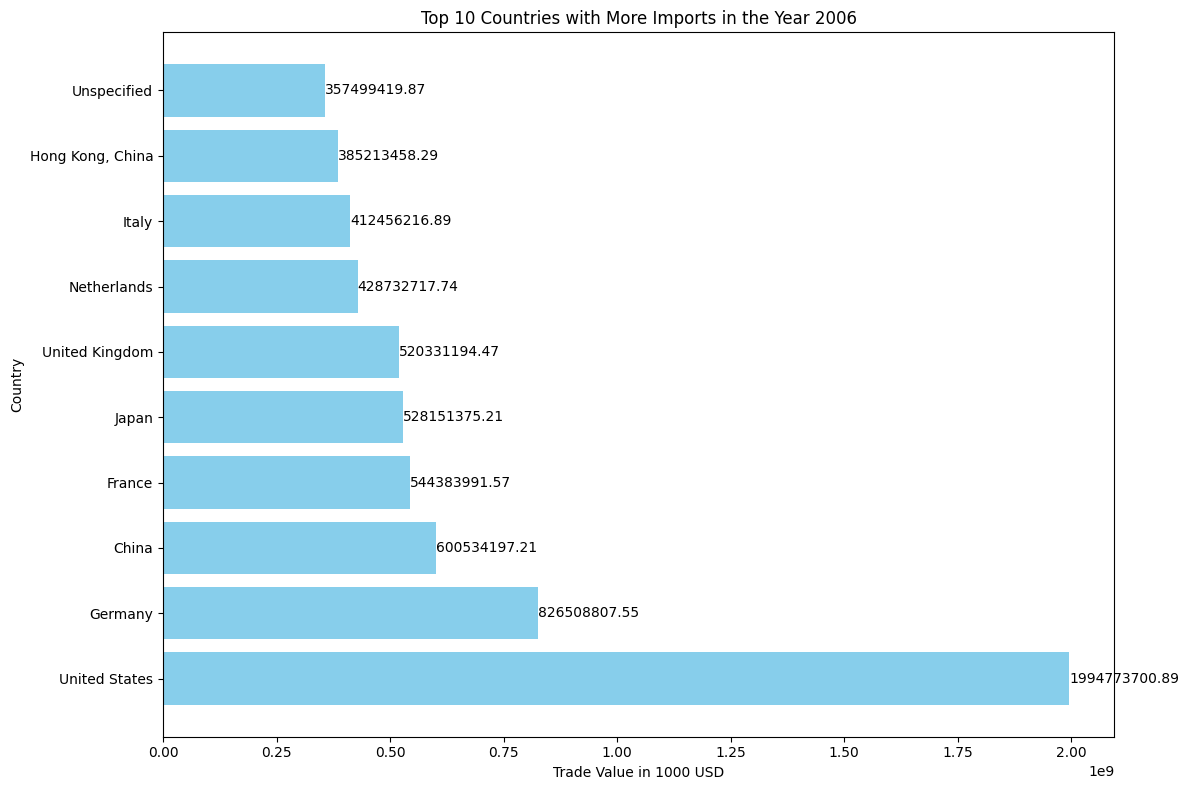

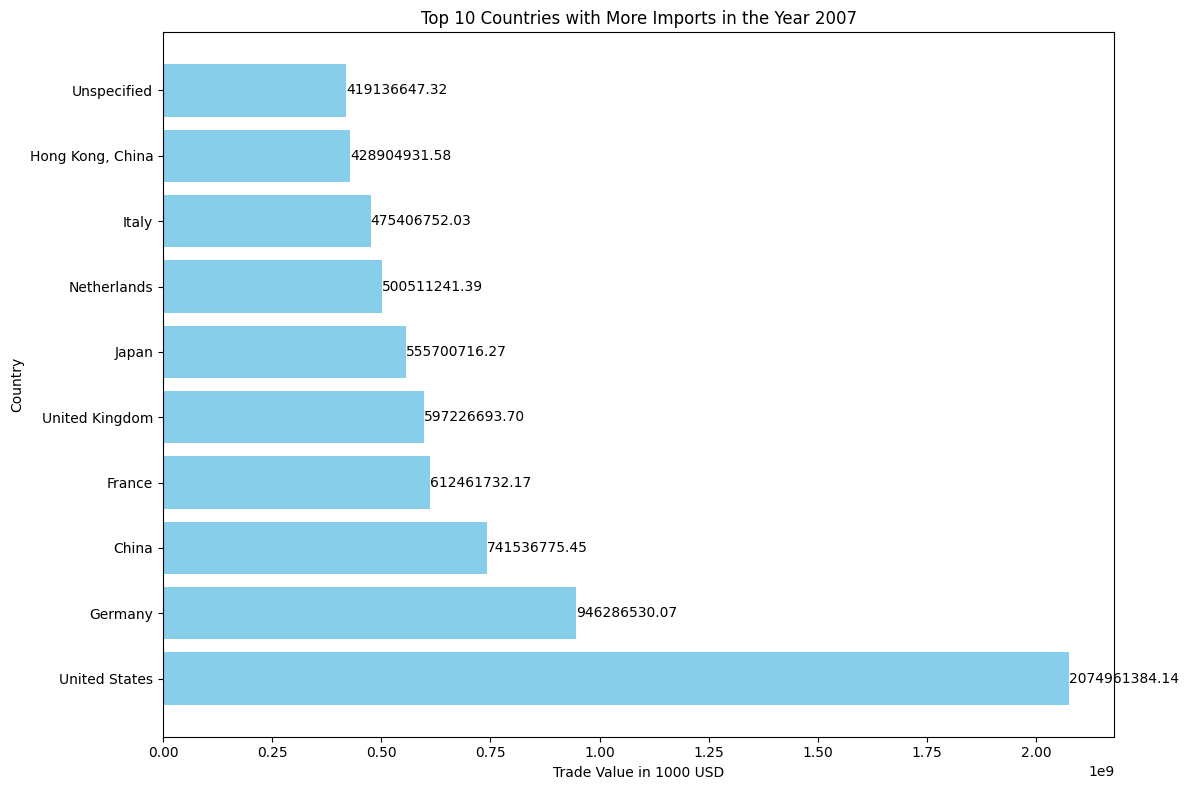

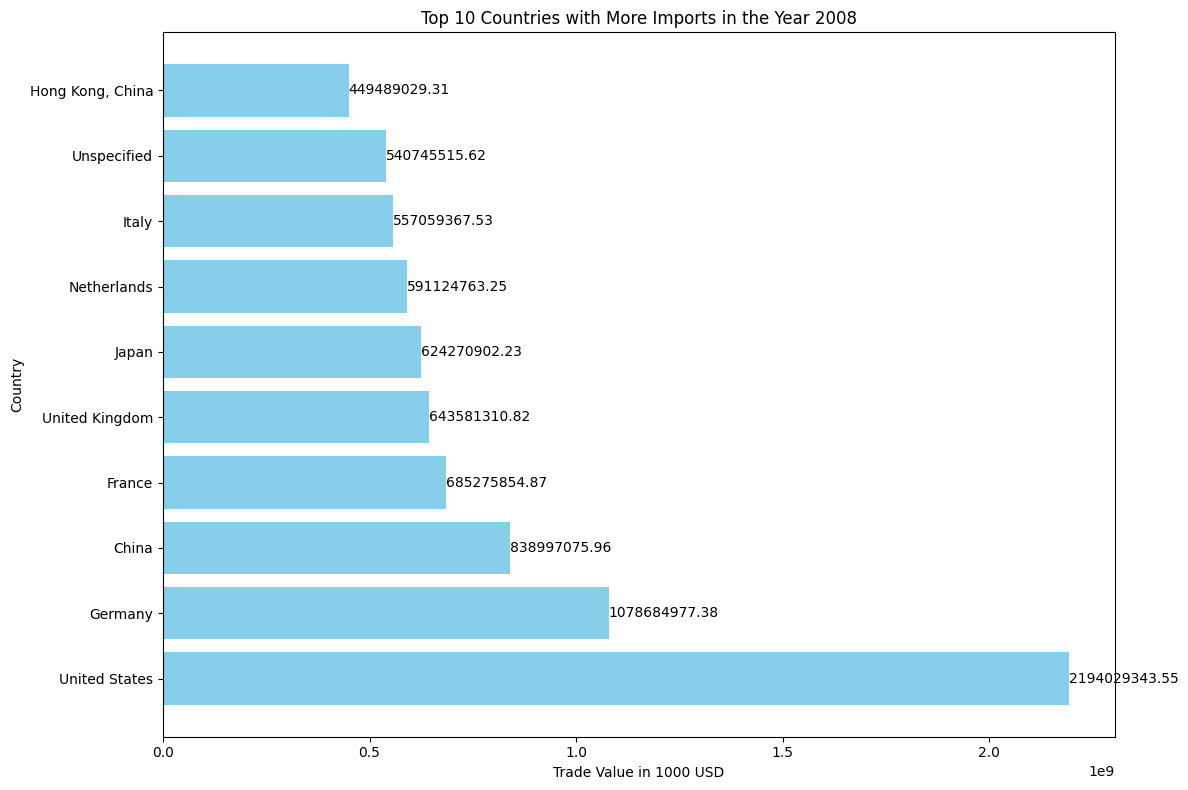

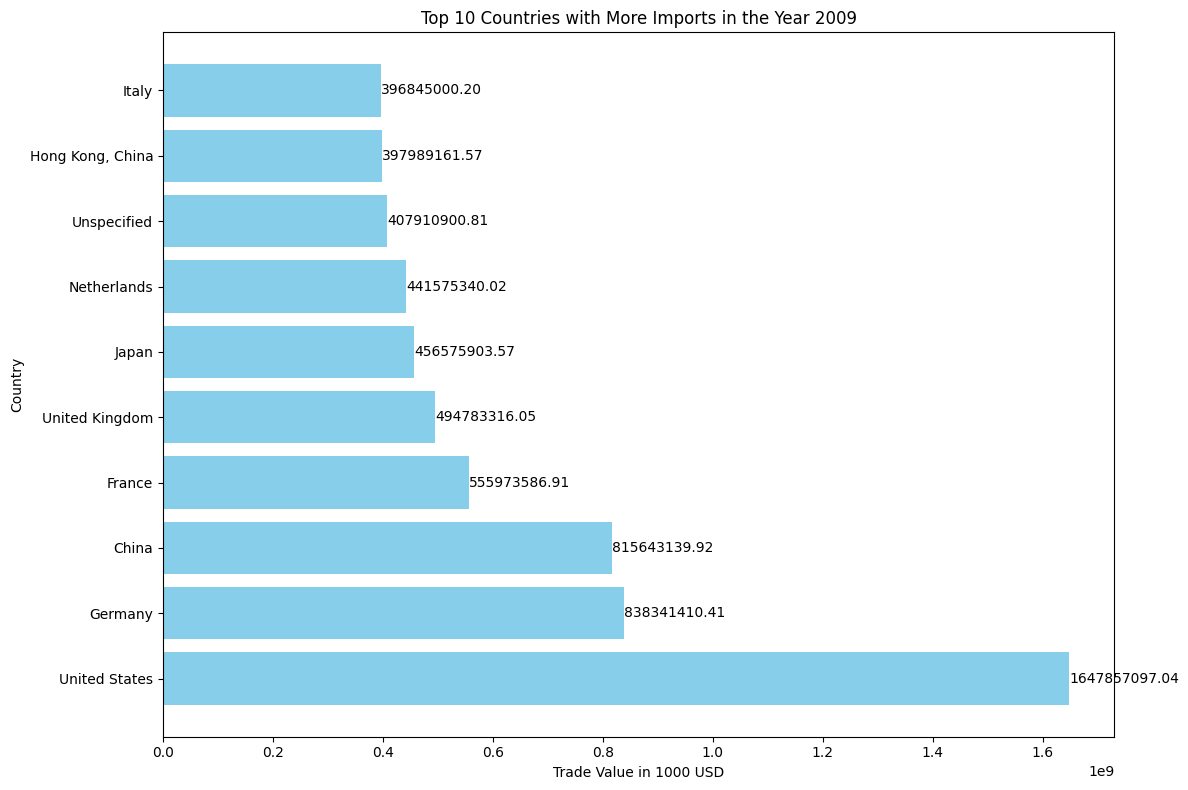

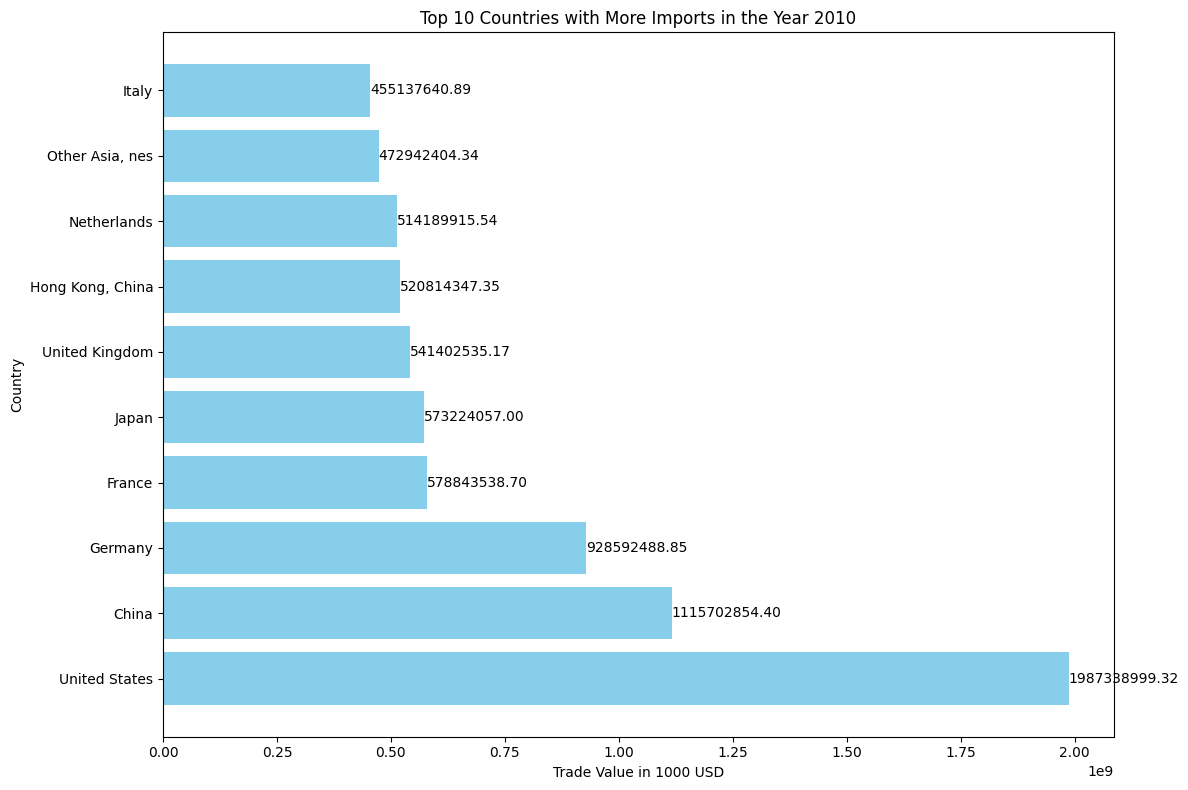

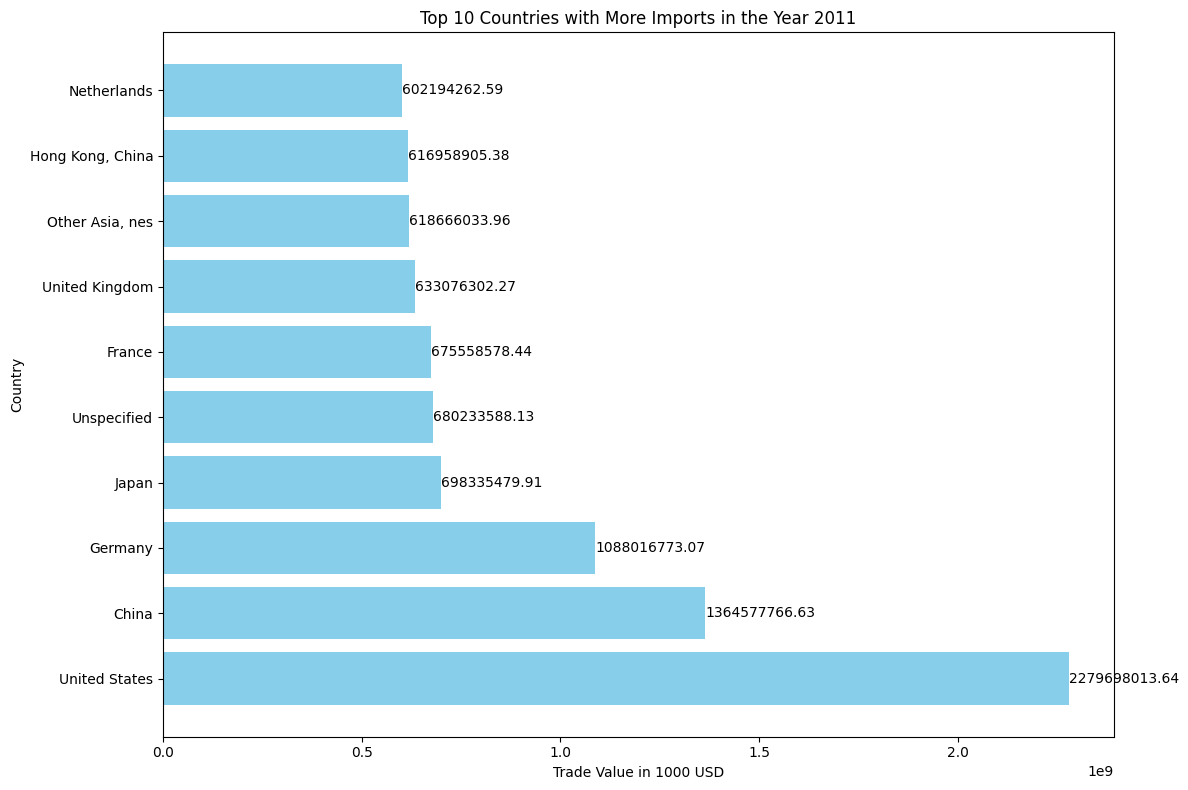

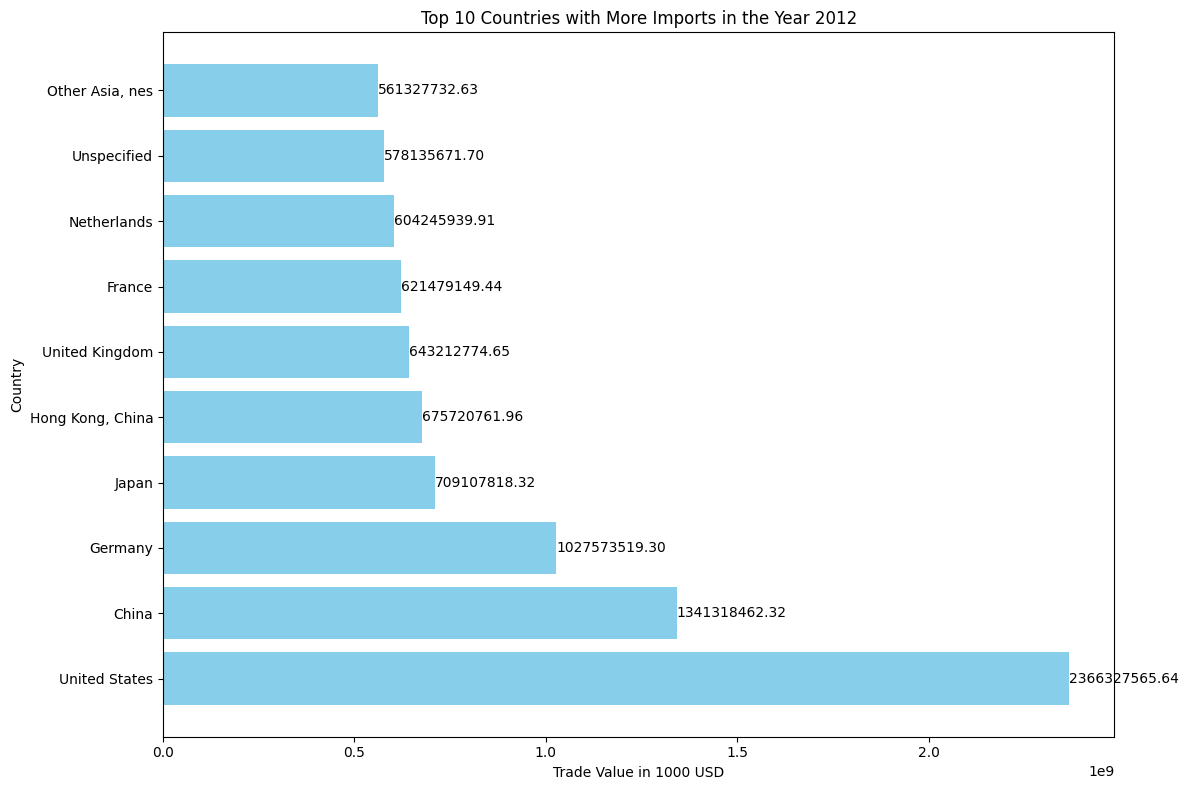

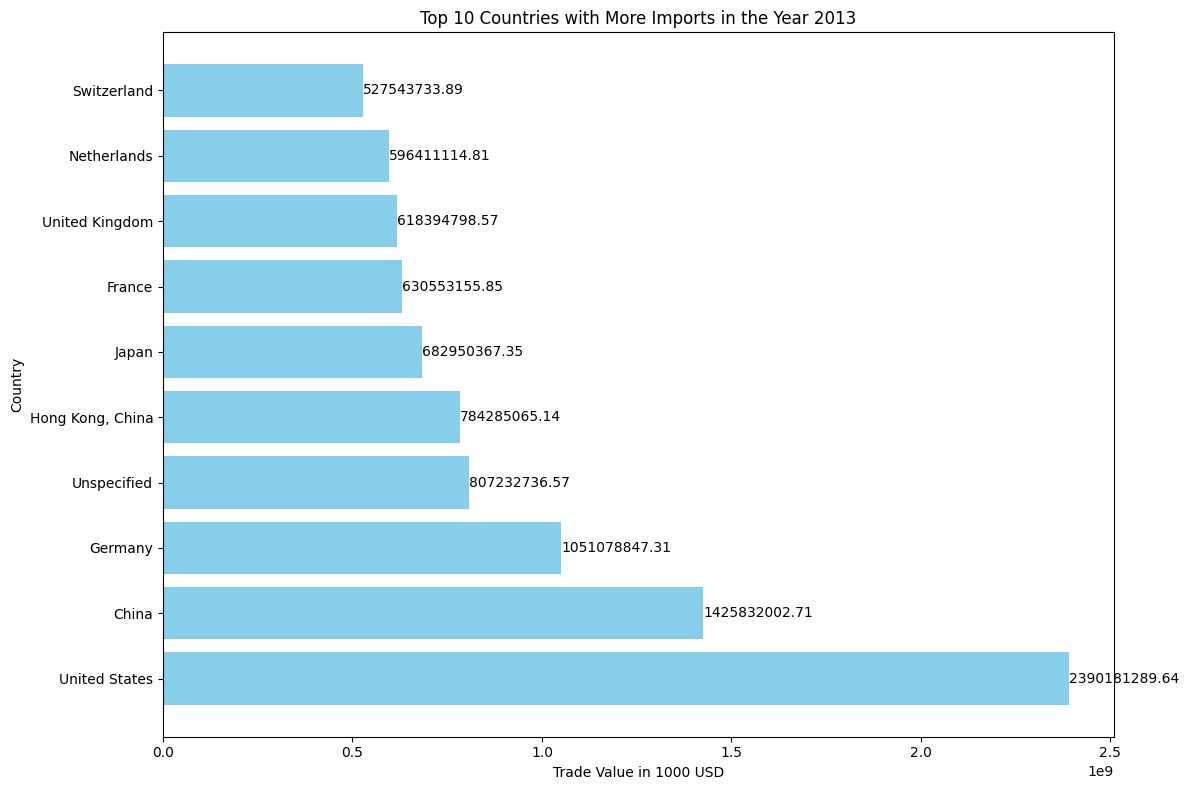

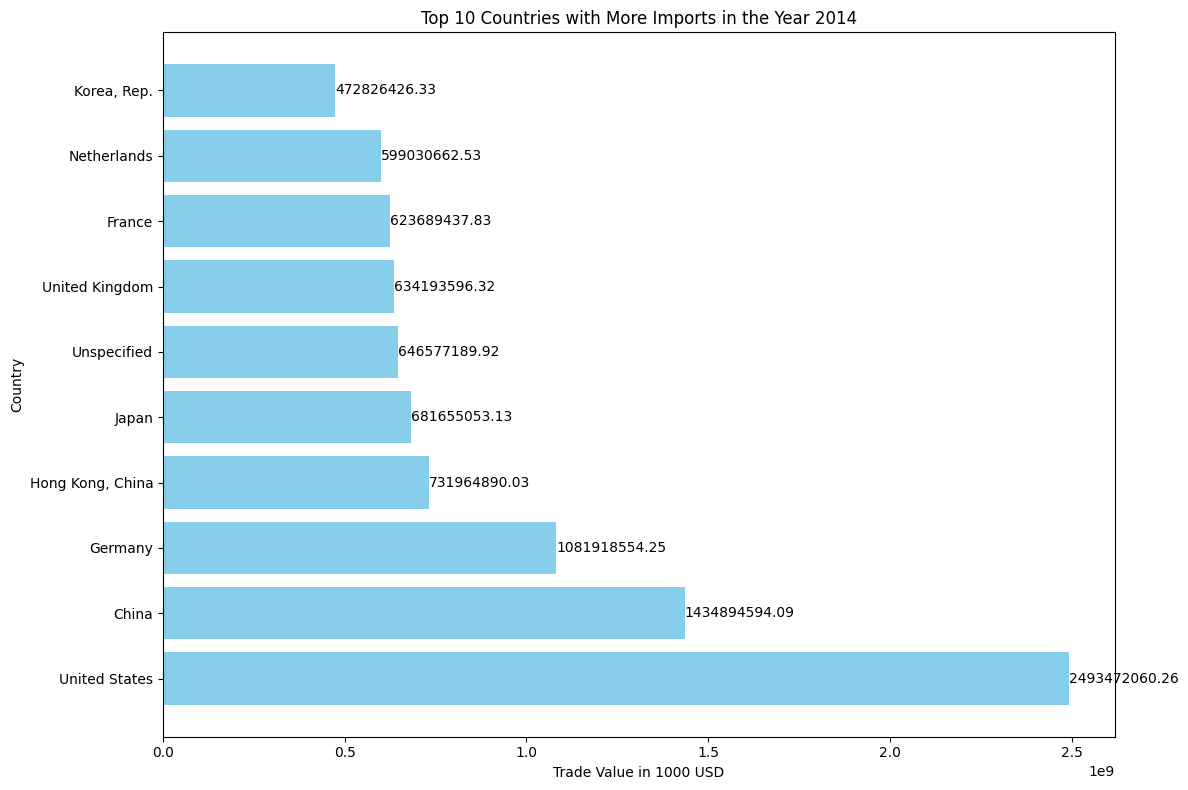

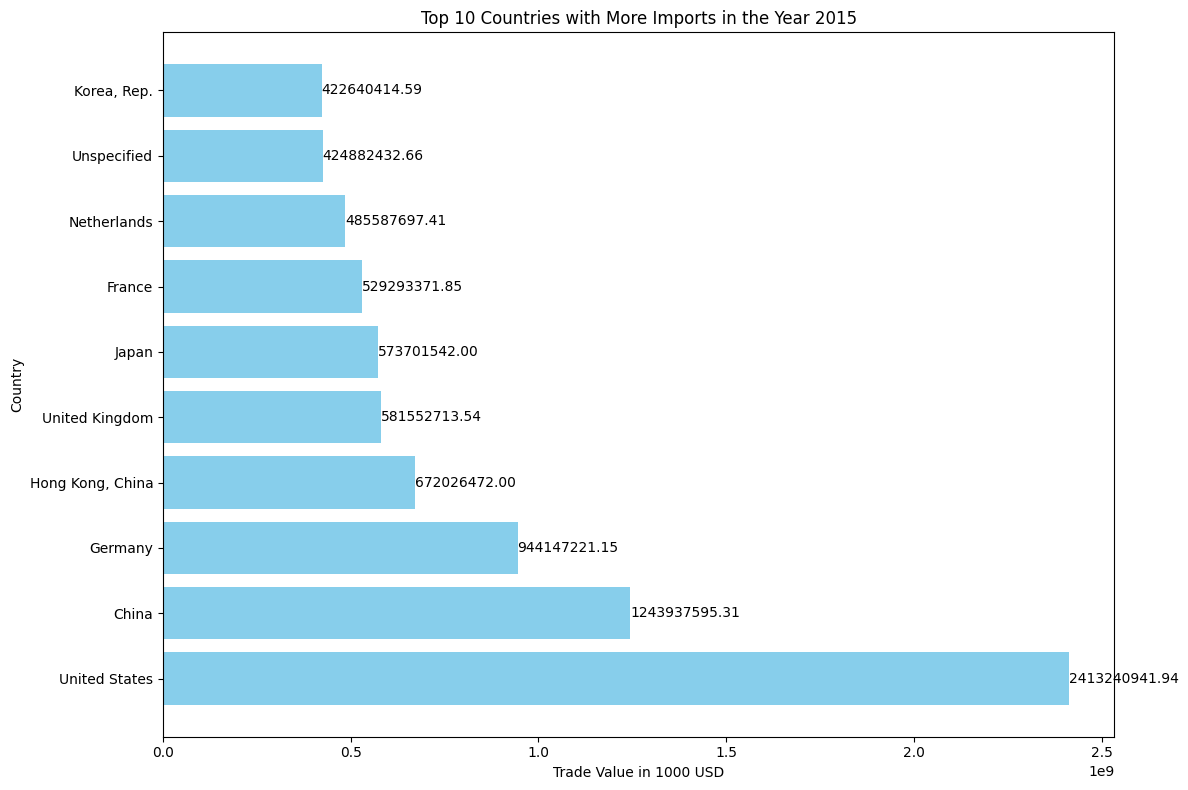

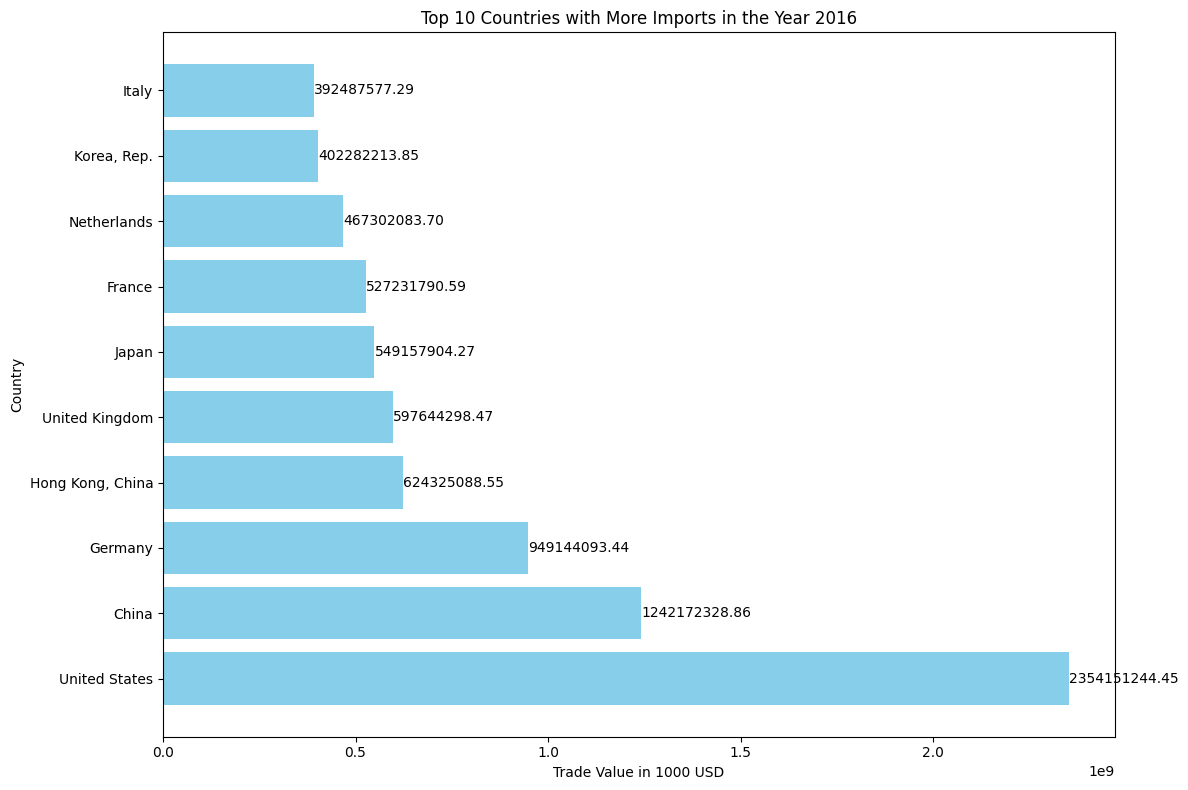

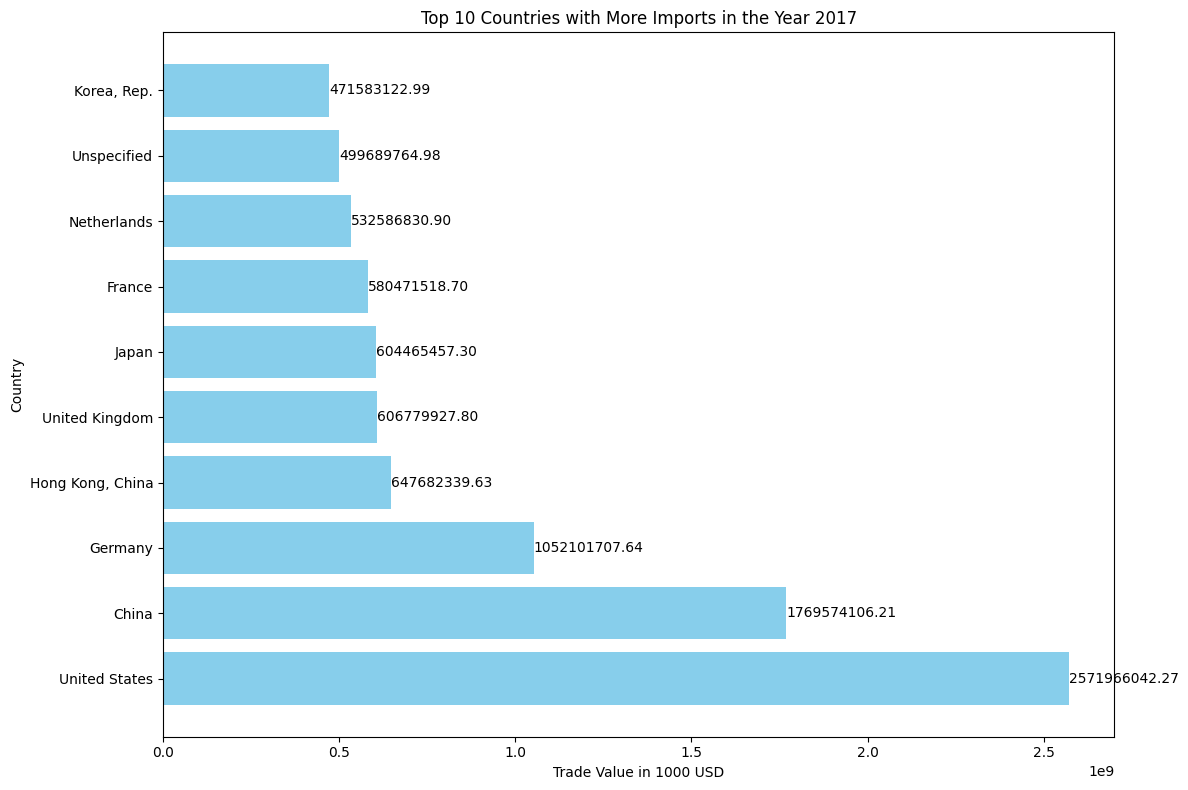

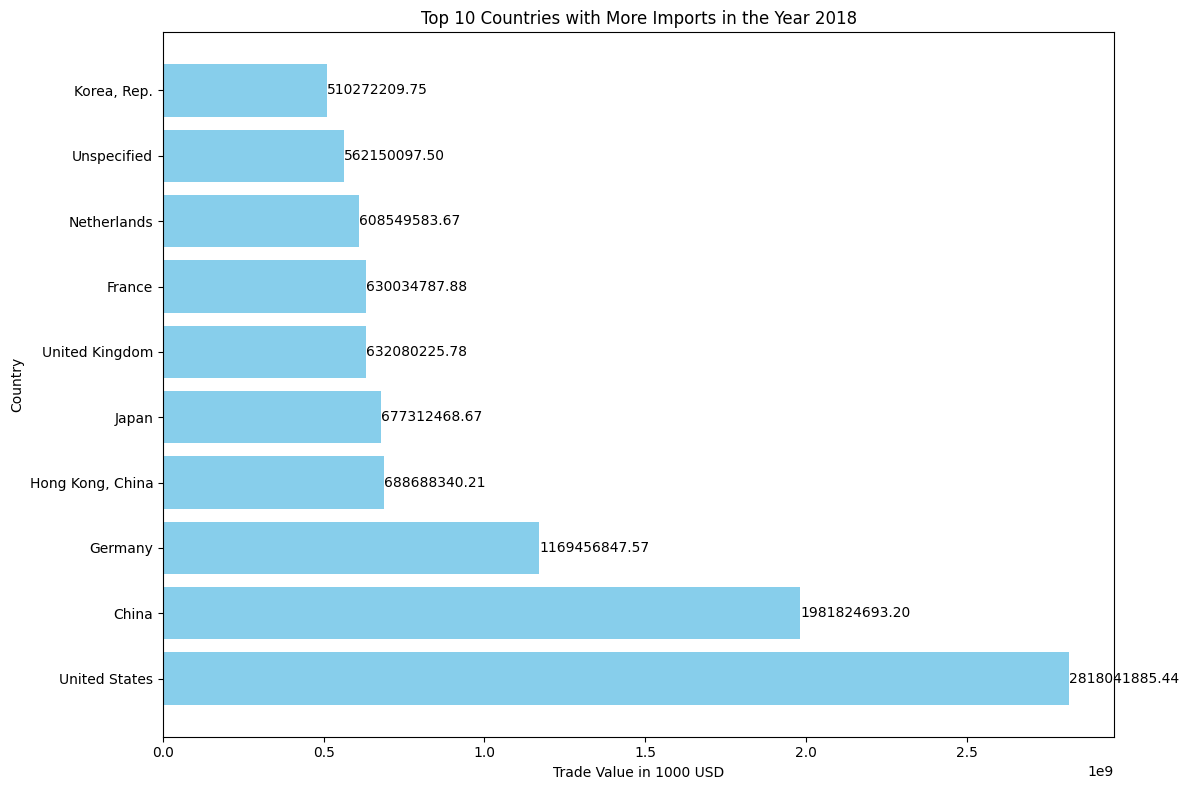

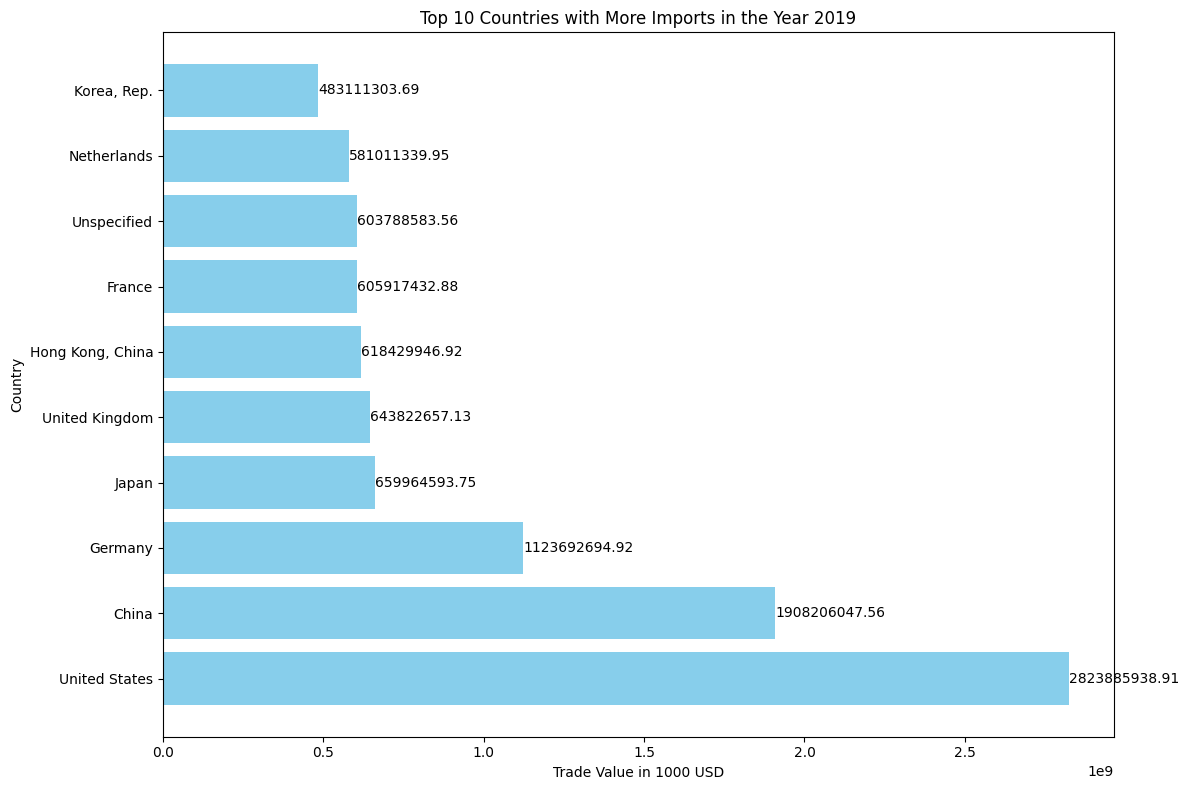

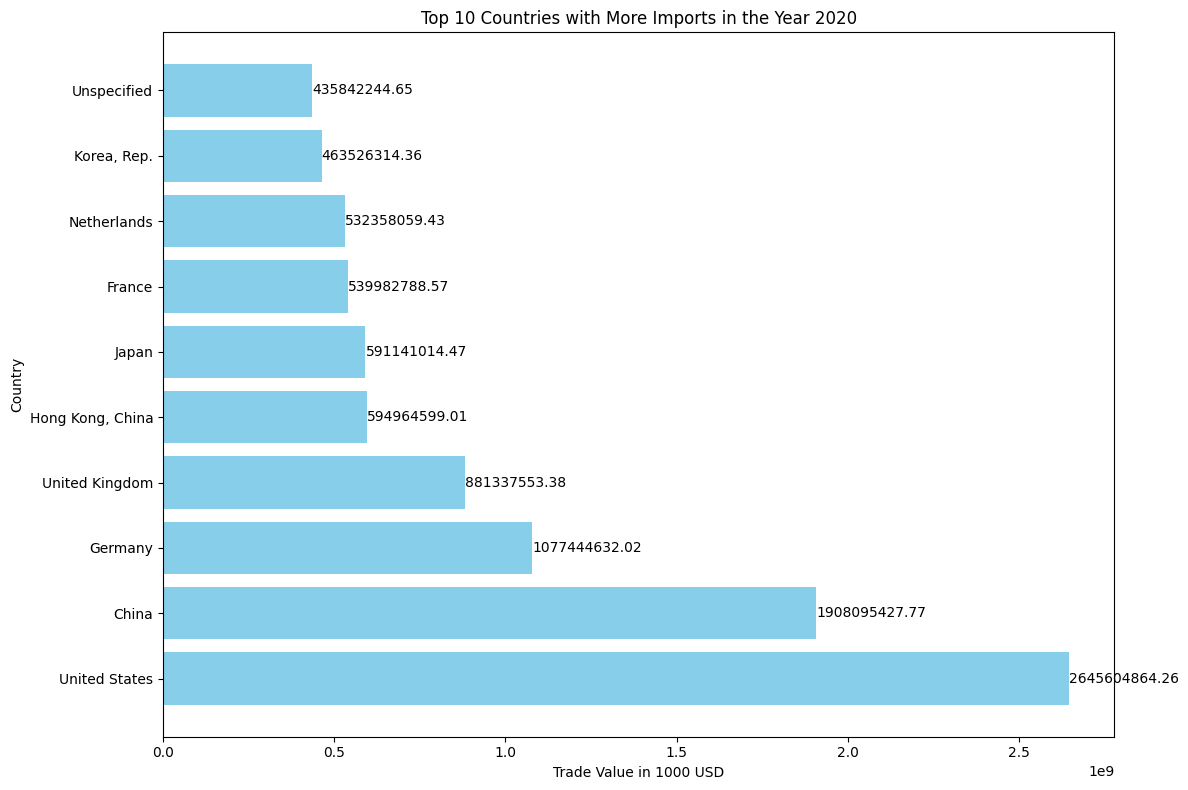

In [17]:
for year in range(2000, 2021):
    data_year = grouped_data[grouped_data['Year'] == year]
    
    top10 = data_year.sort_values(by='TotalTradeValue', ascending=False).head(10)
    
    plt.figure(figsize=(12, 8))
    
    plt.barh(top10['Partner'], top10['TotalTradeValue'], color='skyblue')

    plt.ylabel('Country')
    plt.xlabel('Trade Value in 1000 USD')
    plt.title(f'Top 10 Countries with More Imports in the Year {year}')

    for index, value in enumerate(top10['TotalTradeValue']):
        plt.text(value, index, f'{value:.2f}', va='center', ha='left')

    plt.tight_layout()

    plt.savefig(os.path.join('graphs/imp/', f'top_imports_{year}.png'))

In [ ]:
years = grouped_data['Year'].unique()

for year in range(2000, 2021):

    data_year = grouped_data[grouped_data['Year'] == year]
    
    top10 = data_year.sort_values(by='TotalTradeValue', ascending=False).head(10)
    
    fig = px.bar(top10, x='Partner', y='TotalTradeValue',
                            color='Partner', 
                           hover_name='Partner', 
                           labels={'TotalTradeValue': 'Trade Value in 1000 USD', 'Partner': 'Country'},
                           title=f'Top 10 Countries with more Imports in the year {year}') 
    

    fig.update_layout(width=1000, height=600)
    

    fig.show()
    
    pio.write_html(fig, file=f'graphs/imp/top_imports_{year}.html', auto_open=False)

## 2.1.3 Top 10 países con menos importaciones 2000 - 2020

C:\Users\maarp\AppData\Local\Temp\ipykernel_9036\2040718908.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


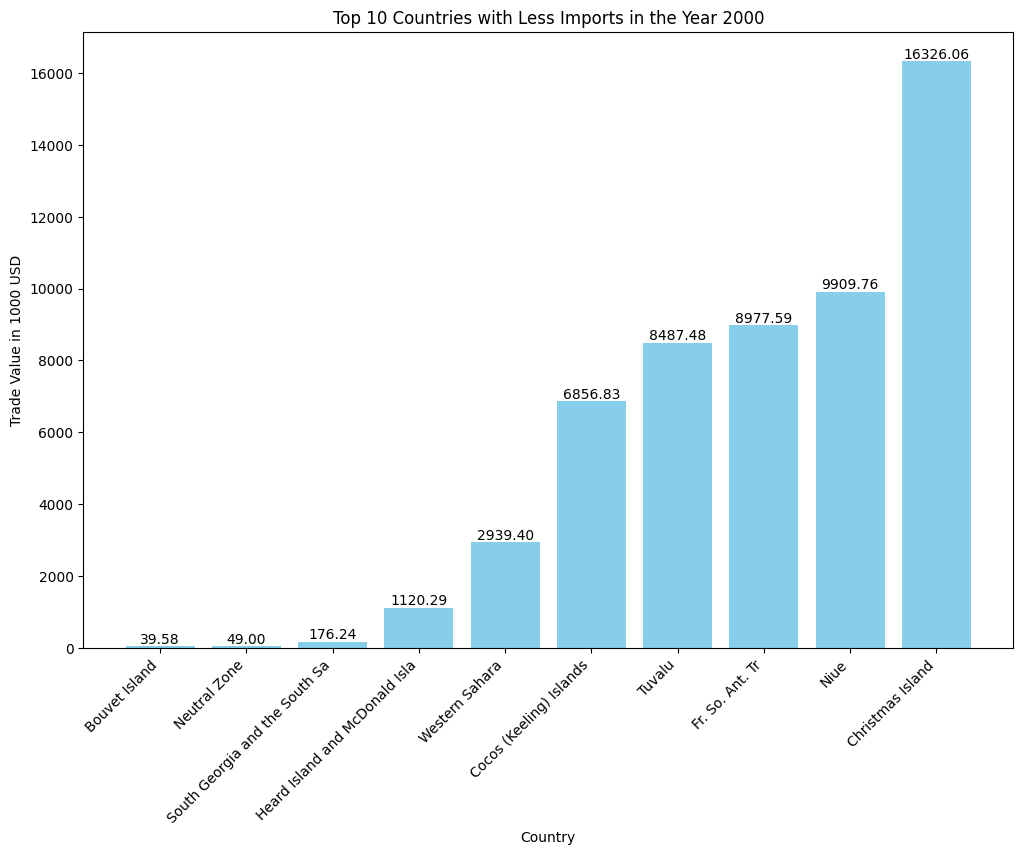

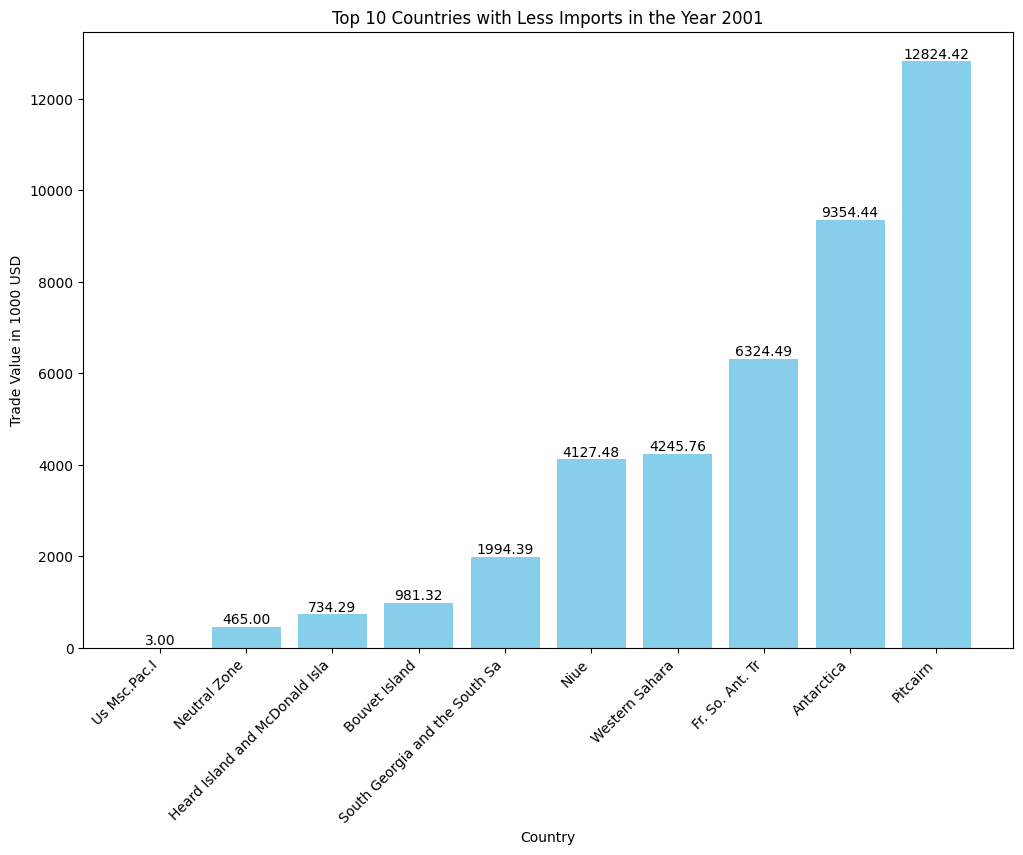

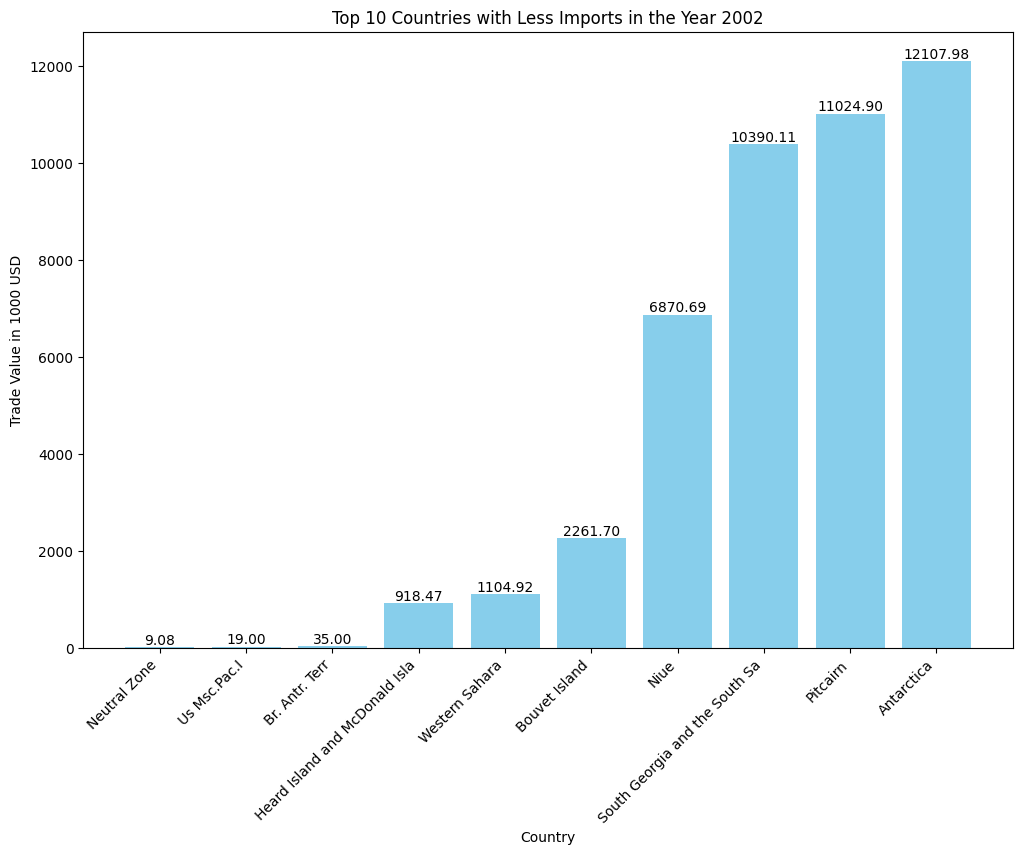

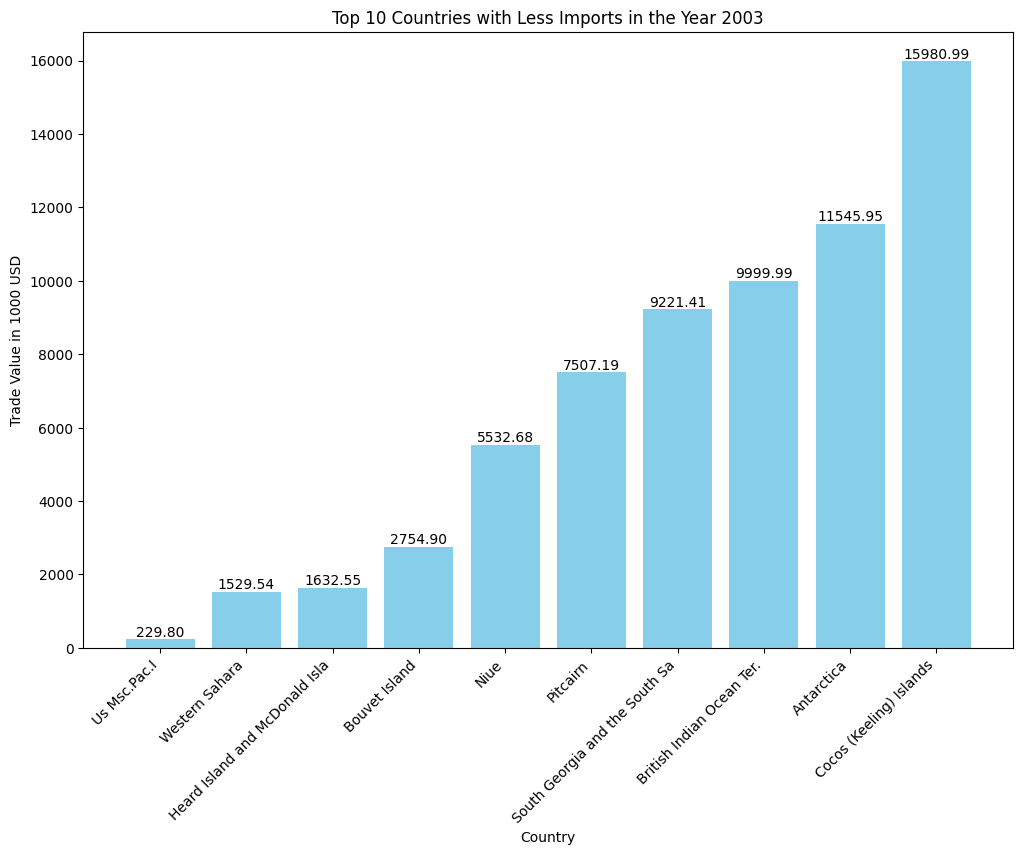

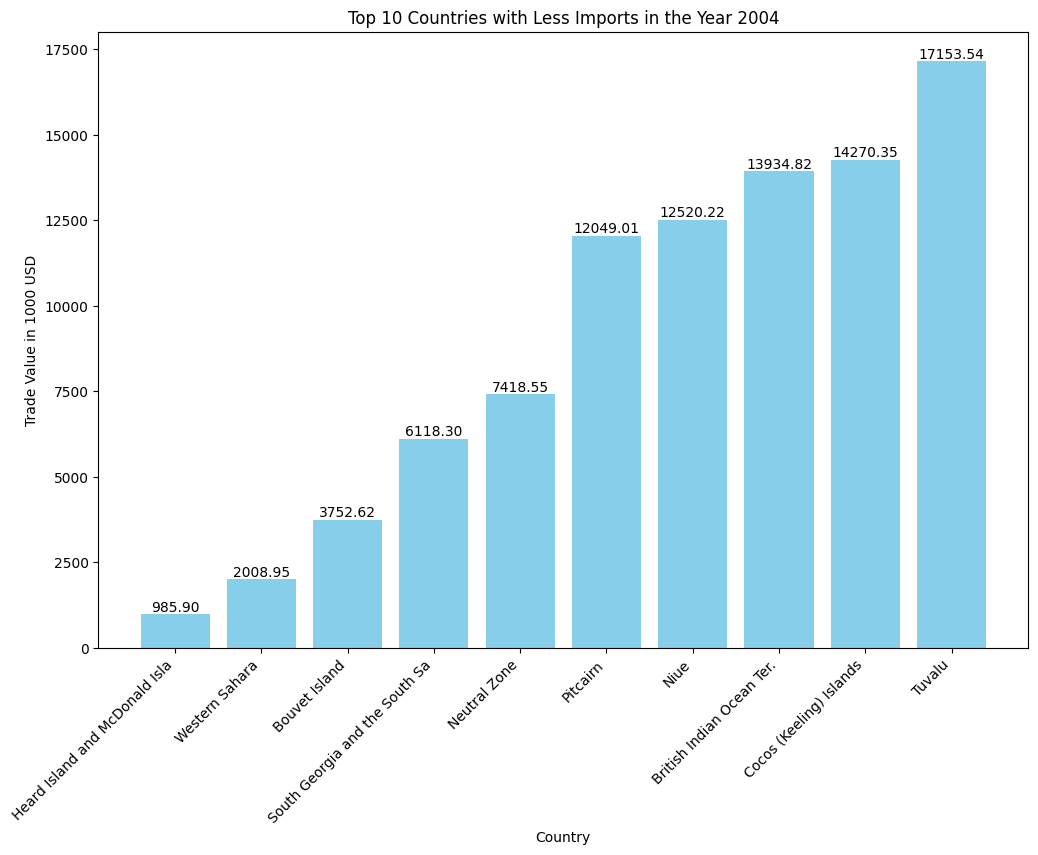

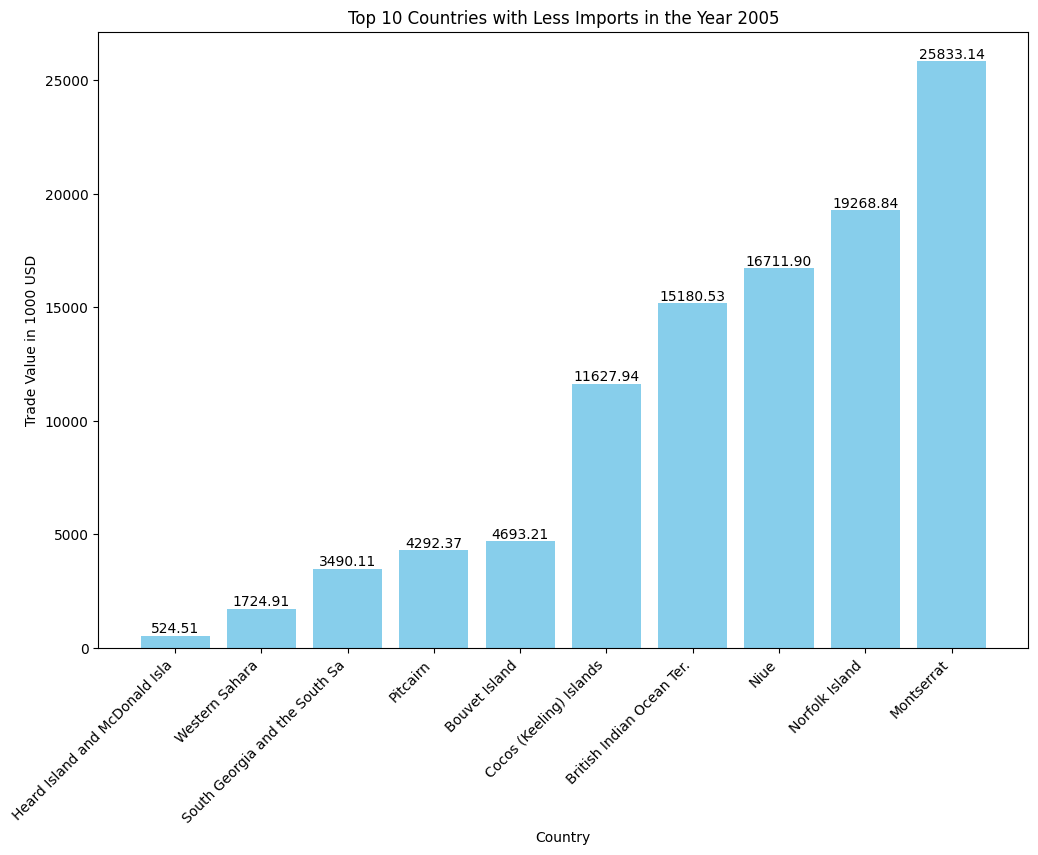

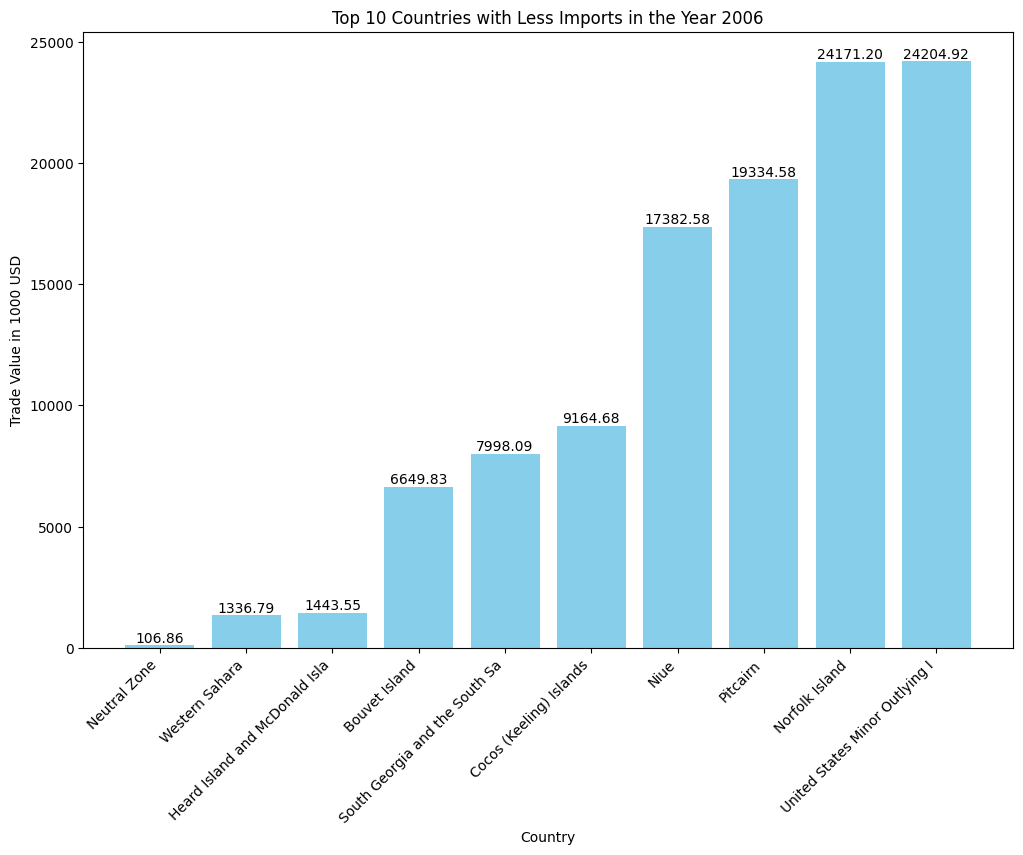

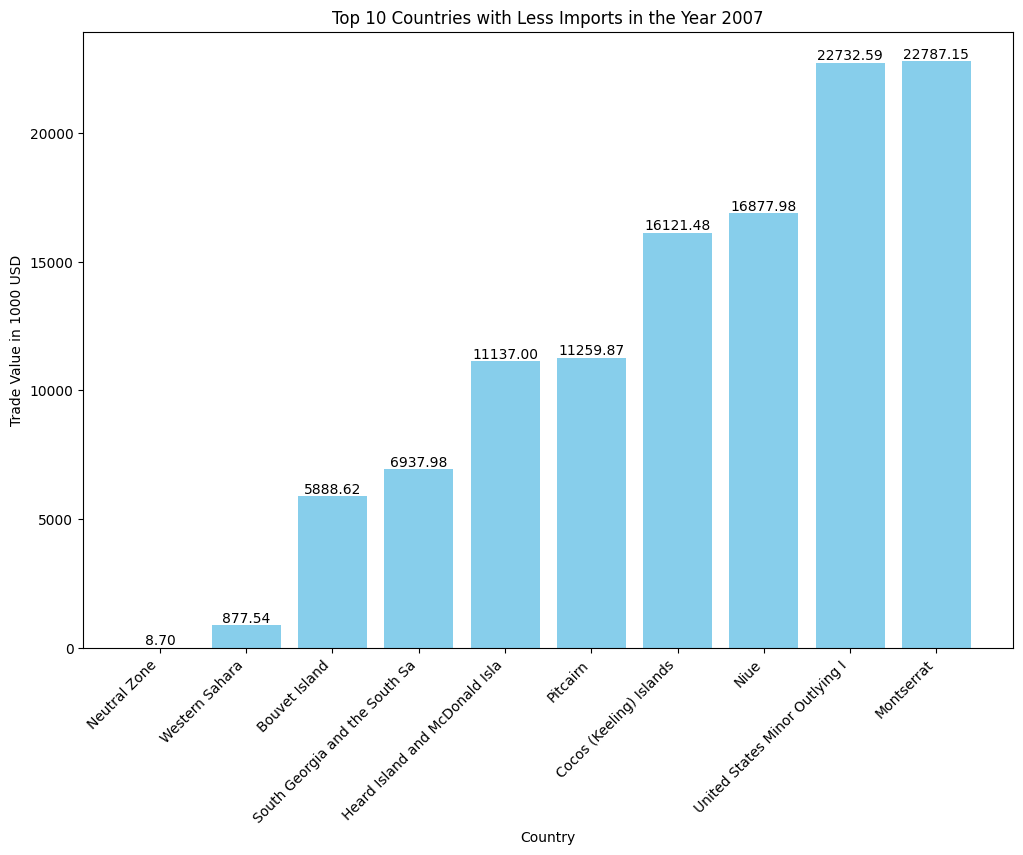

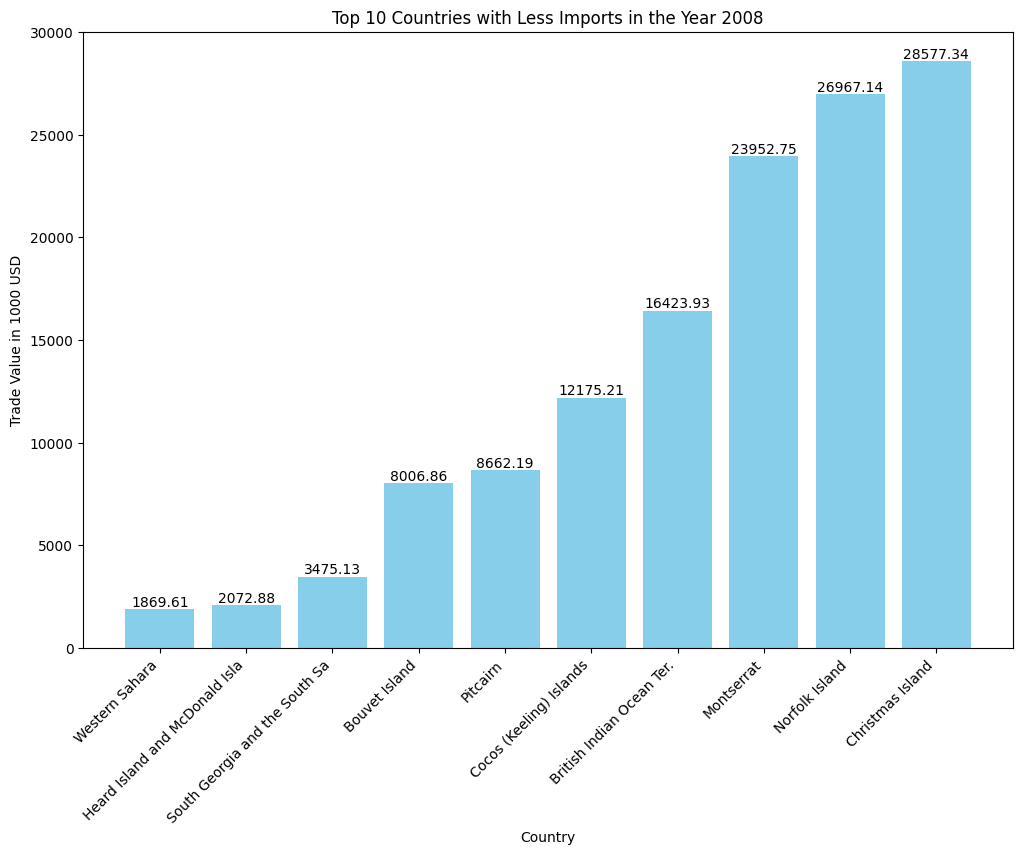

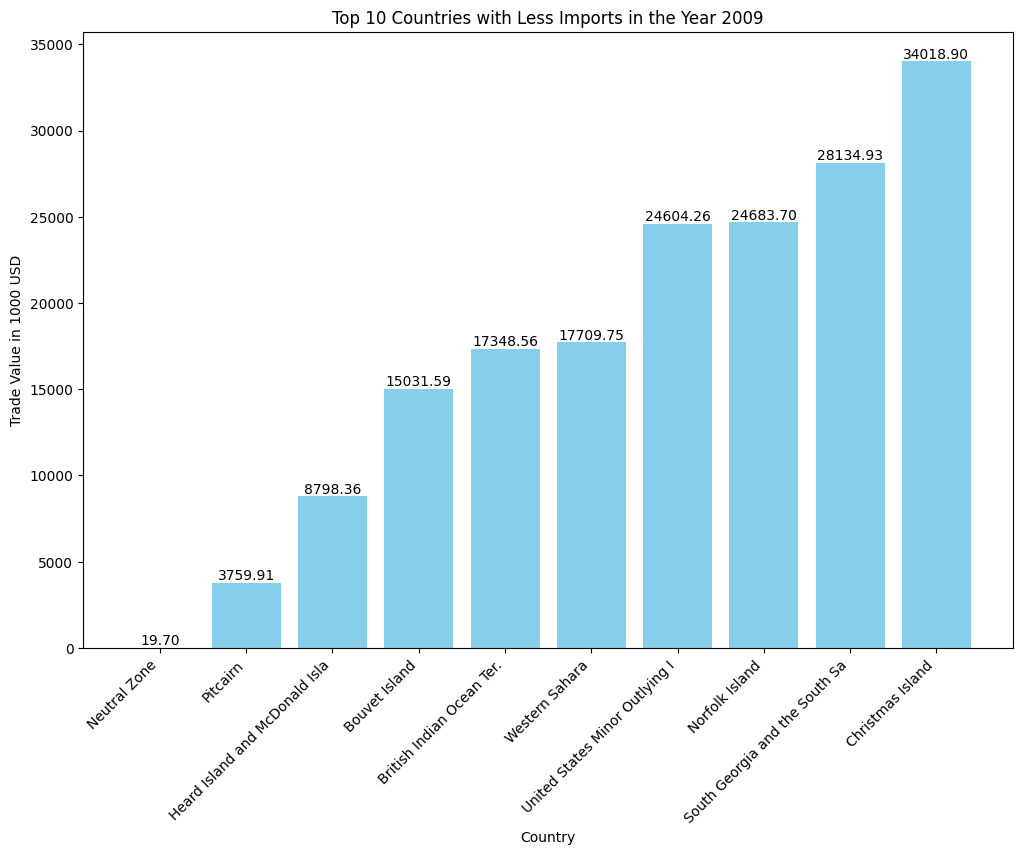

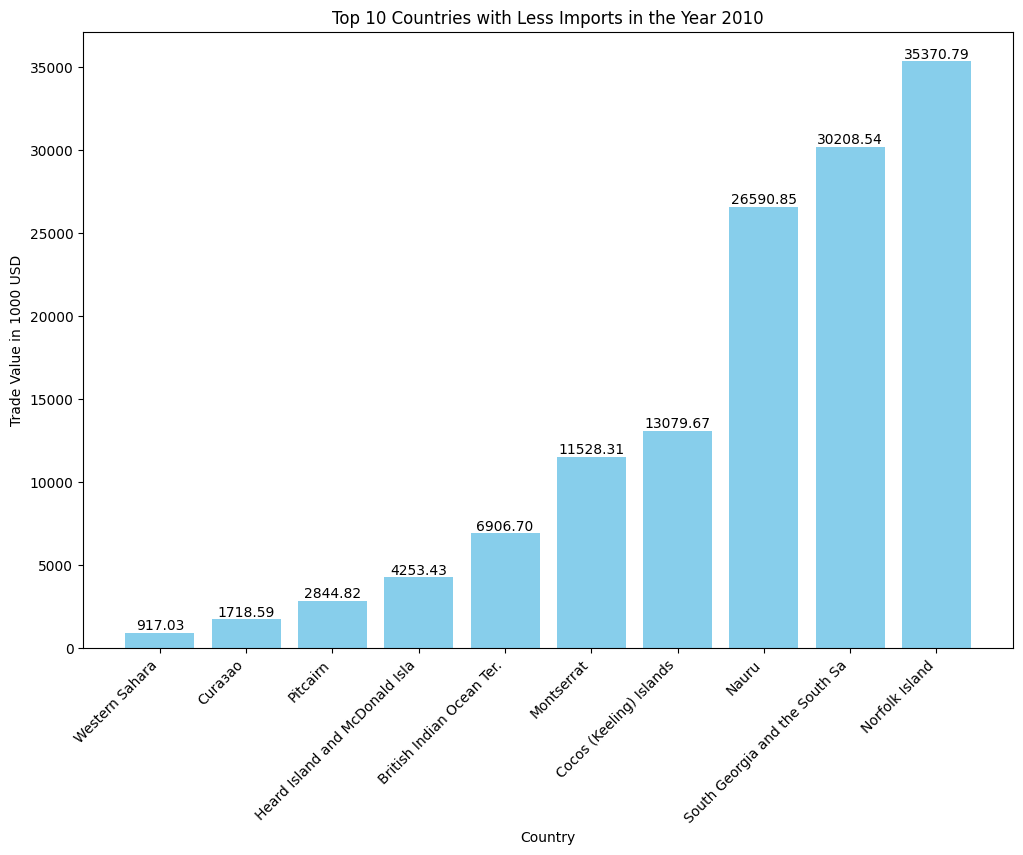

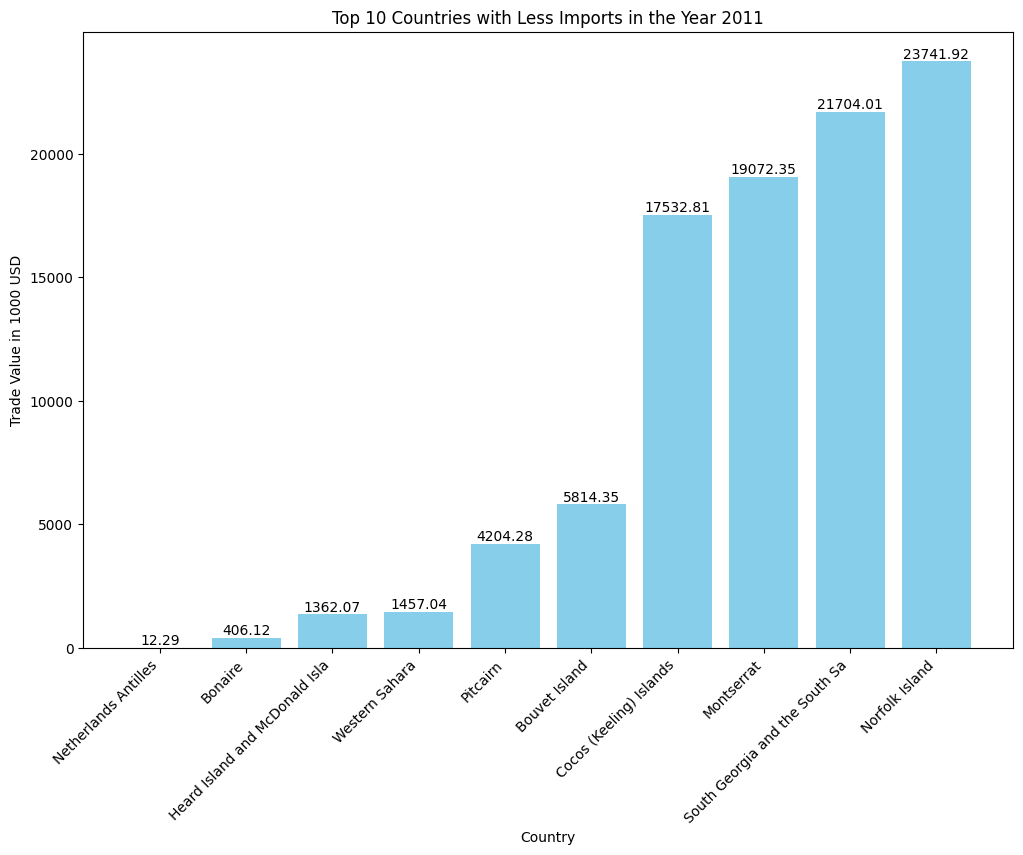

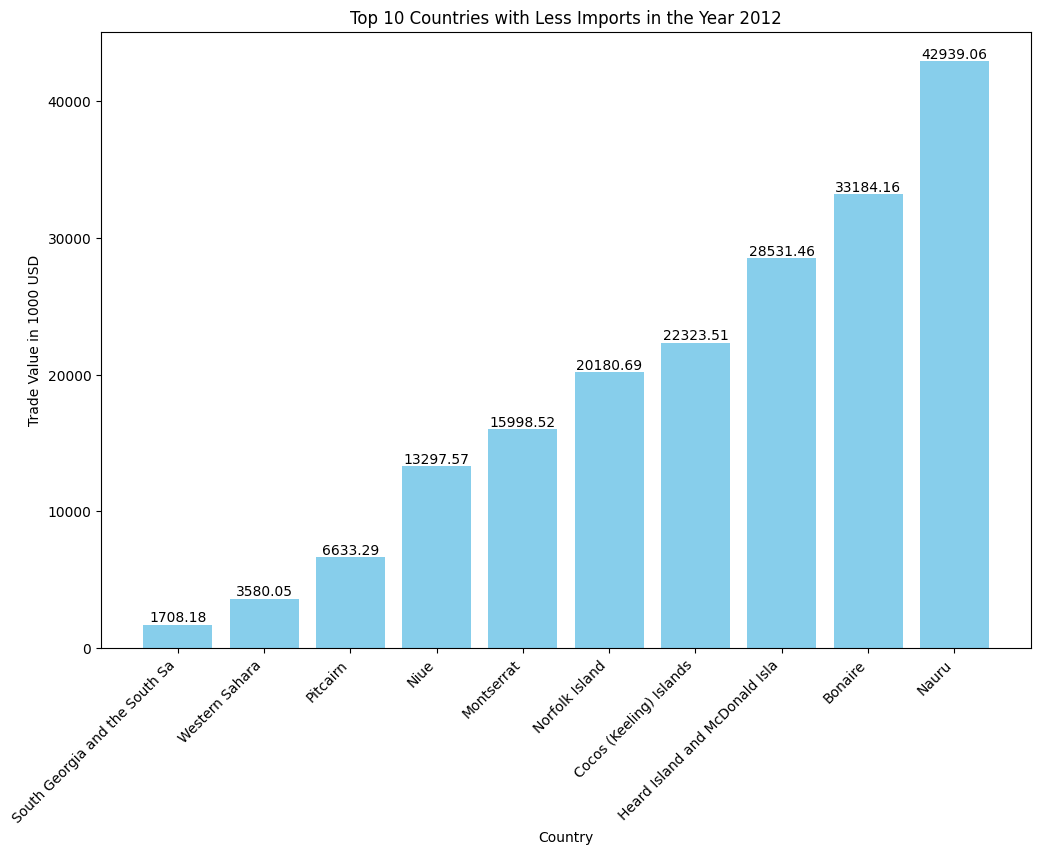

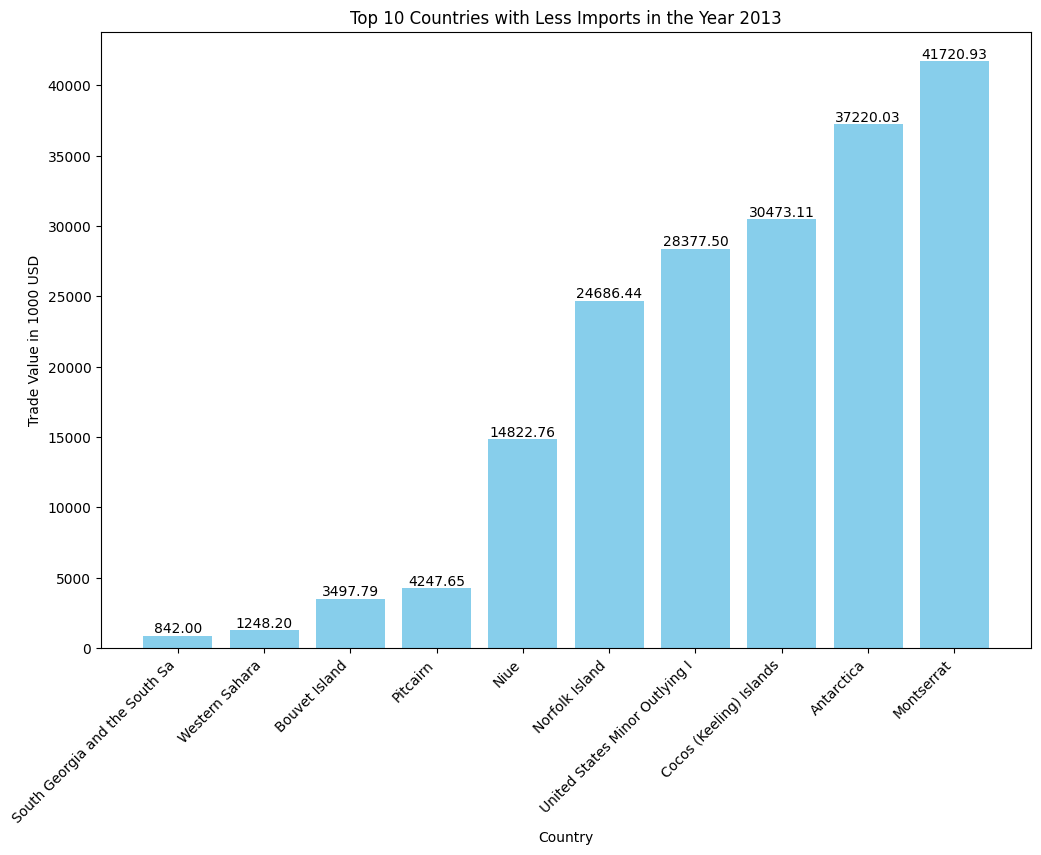

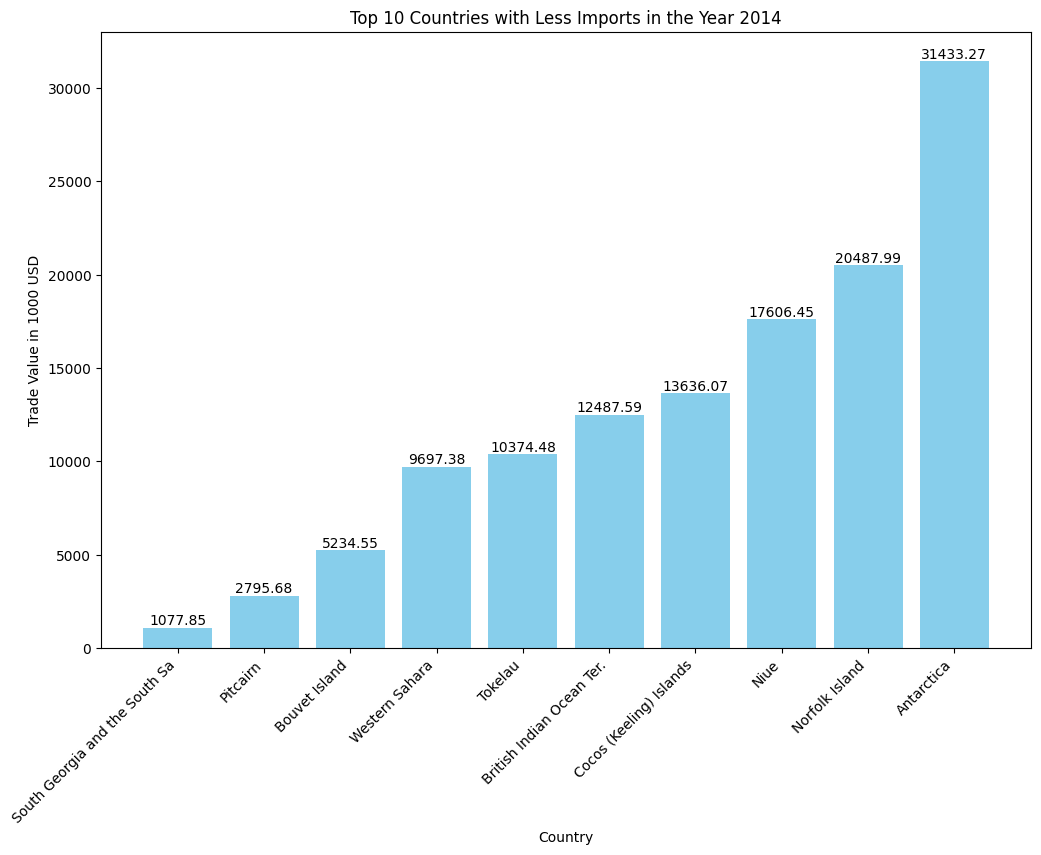

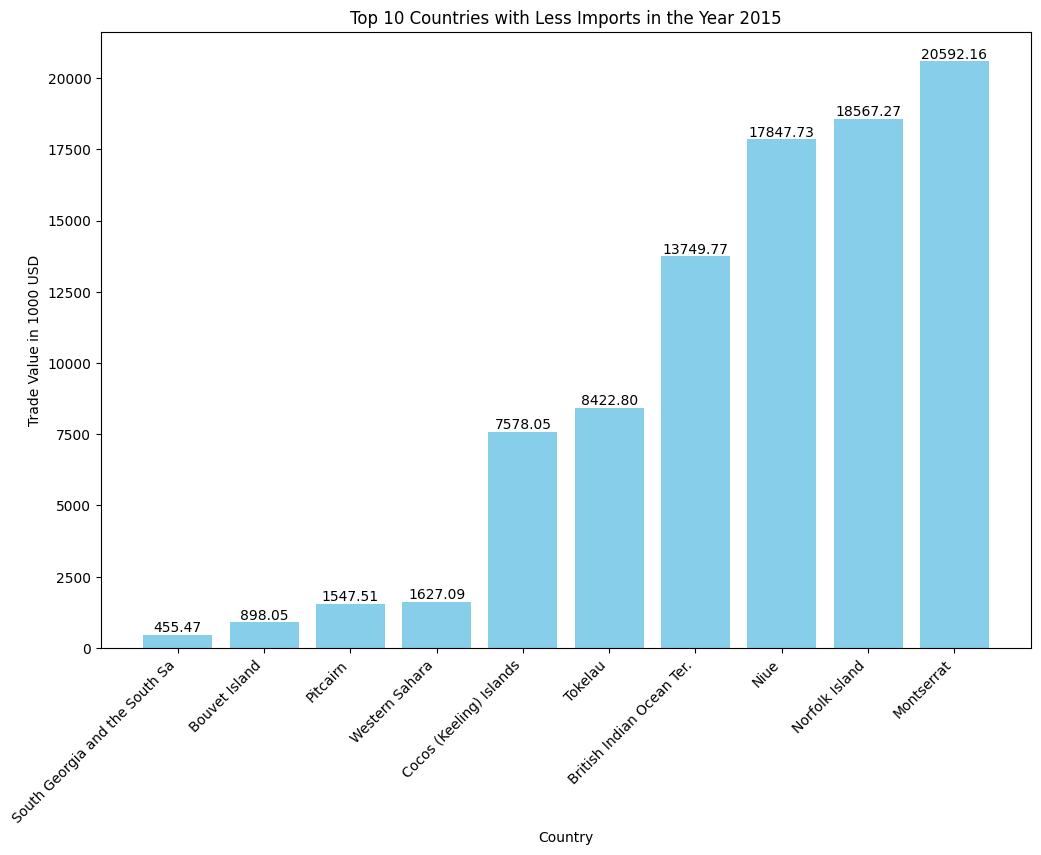

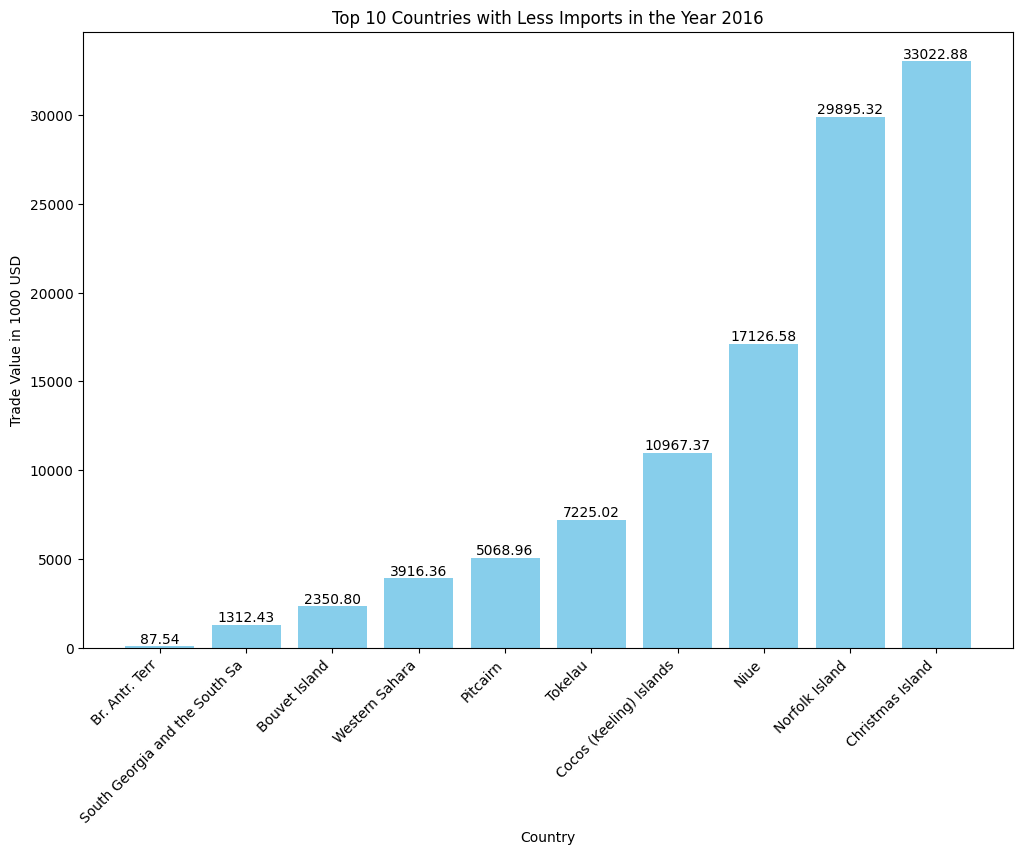

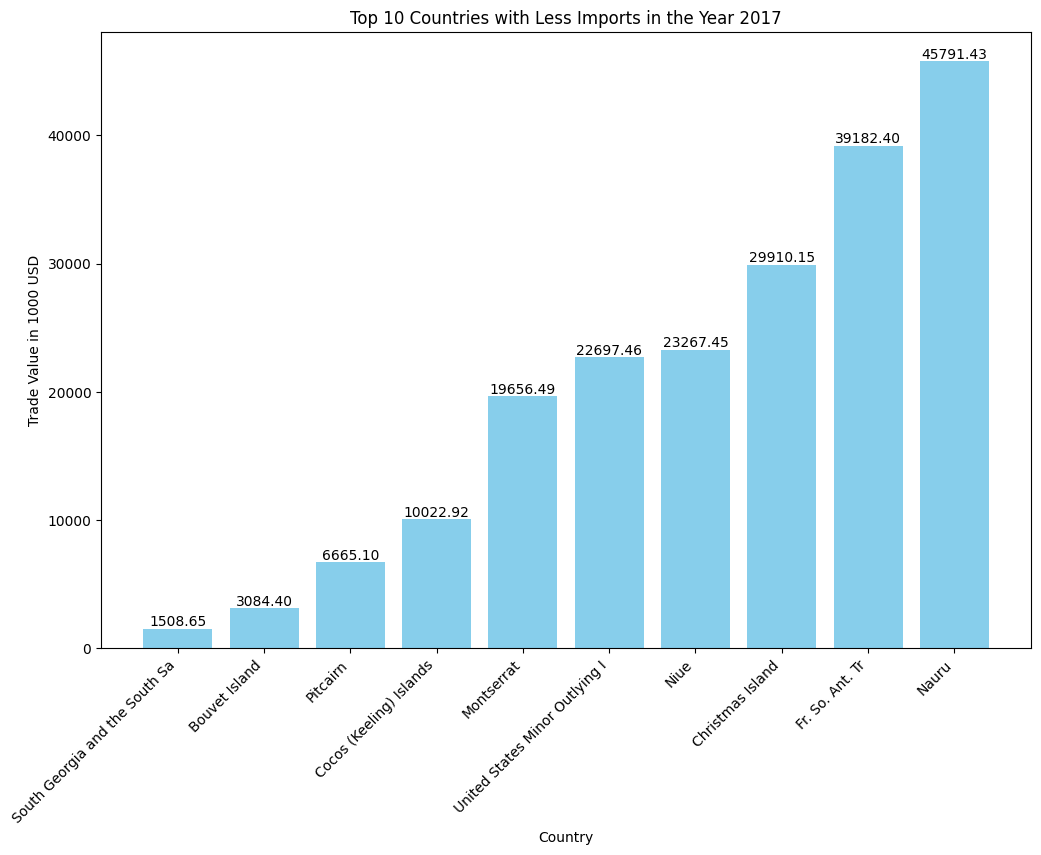

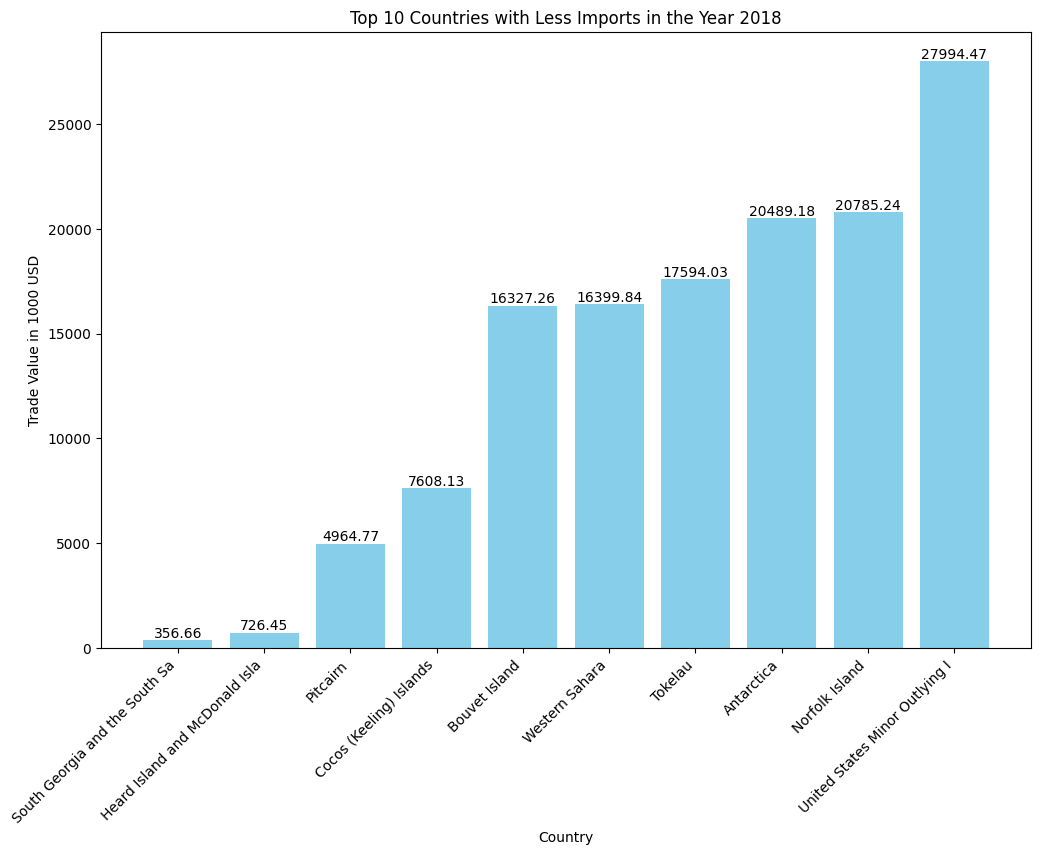

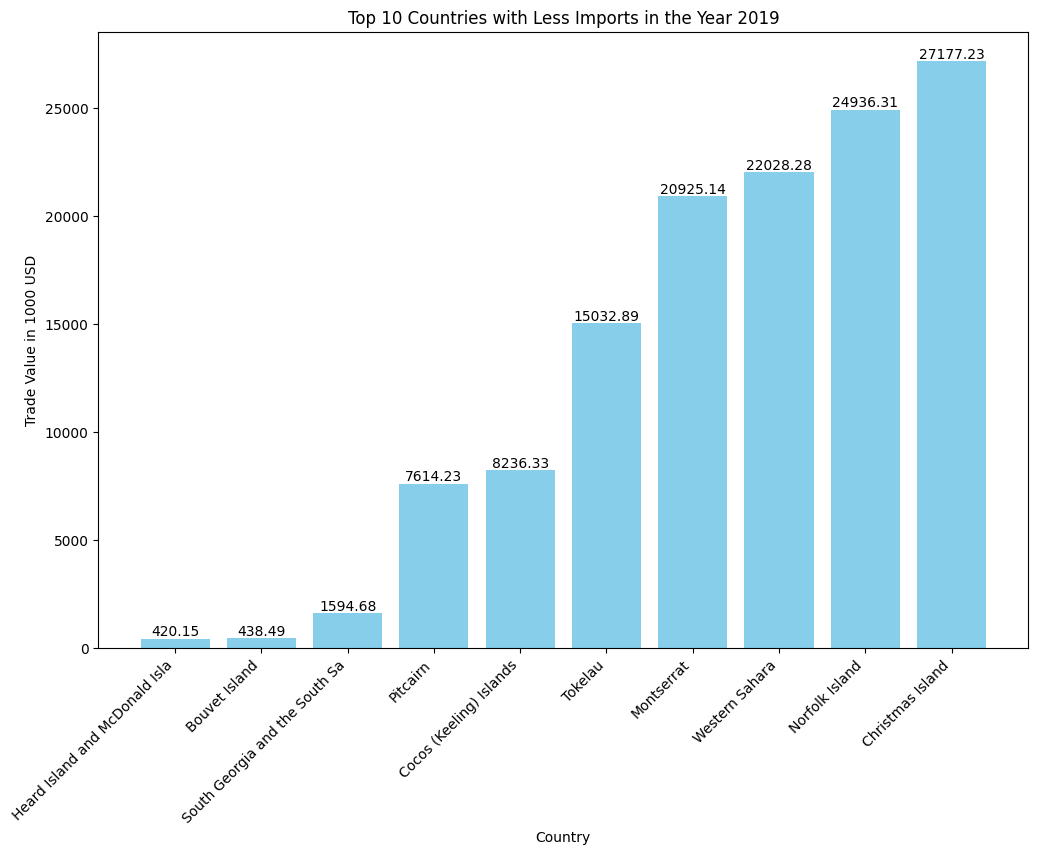

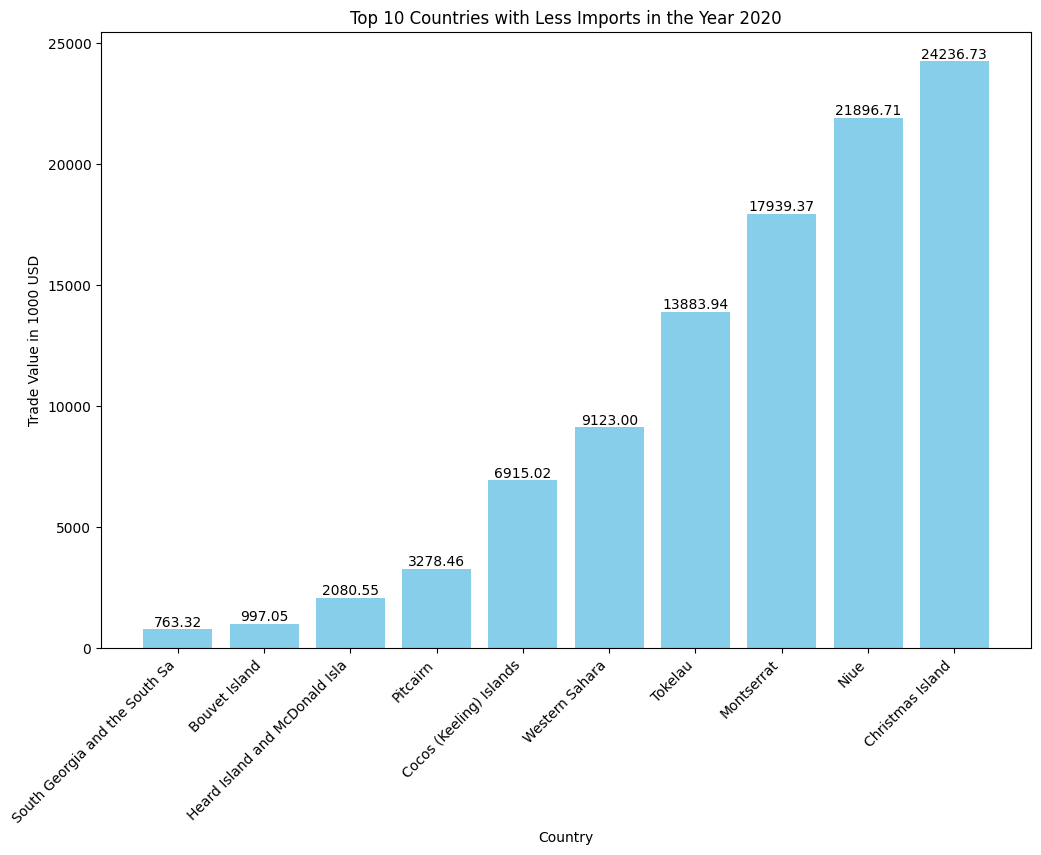

In [13]:
for year in range(2000, 2021):
    data_year = grouped_data[grouped_data['Year'] == year]
    
    top10 = data_year.sort_values(by='TotalTradeValue', ascending=True).head(10)
    
    plt.figure(figsize=(12, 8))
    
    plt.barh(top10['Partner'], top10['TotalTradeValue'], color='skyblue')

    plt.ylabel('Country')
    plt.xlabel('Trade Value in 1000 USD')
    plt.title(f'Top 10 Countries with Less Imports in the Year {year}')

    for index, value in enumerate(top10['TotalTradeValue']):
        plt.text(value, index, f'{value:.2f}', va='center', ha='left')

    plt.tight_layout()

    plt.savefig(os.path.join('graphs/imp/', f'bottom_imports_{year}.png'))

In [ ]:
years = grouped_data['Year'].unique()

for year in range(2000, 2020):

    data_year = grouped_data[grouped_data['Year'] == year]
    
    top10 = data_year.sort_values(by='TotalTradeValue', ascending=True).head(10)
    
    fig = px.bar(top10, x='Partner', y='TotalTradeValue',
                            color='Partner', 
                           hover_name='Partner', 
                           labels={'TotalTradeValue': 'Trade Value (million of USD)', 'Partner': 'Country'},
                           title=f'Top 10 countries with less exports in the year {year}') 
    

    fig.update_layout(width=1000, height=600)
    

    fig.show()
    
pio.write_html(fig, file=f'graphs/imp/bottom_imports_{year}.html', auto_open=False)
